<h1 fontsize=20>[Machine Learning] Wich counrty will you travel first?</h1>
<h2 fontsize=15>Classification with Airbnb new users from USA</h2>


This project was developed with the objective to pratice **Data Analysis**, **Statistics**, **Data Visualization**, **Python** and **Machine Learning**. Guided by this objective, i choose an old competition from Kaggle that contemplated a complete experience of a real Data Science project.

The competition choosed was one of the **AirBnb** that you can see more details by <a href="https://www.kaggle.com/c/airbnb-recruiting-new-user-bookings/overview">clicking here</a>.

It was given the data from new users of USA and some other complementary data. The objetctive is to make a classification algorithm to predict the first country that each user will visit. Since i'm a new learner of machine learning, i choose a ready-made notebook from this competition to be the base of my project and where i could inspire myself when i felt lost. This notebook can be found <a href="https://www.kaggle.com/rounakbanik/airbnb-new-user-bookings">here</a> and you will find a lot of similarity with mine.


**In this notebook you will find:**
- Exploratory data analysis with python, data visualization;
- Statistical tests such as chi-square and Z-Test with statsmodels;
- Data visualization with Matplotlib and Seaborn;
- Machine Learning with scikit-learn and AutoML with PyCaret;


**This notebook is divides in:**
- Importing Libraries;
- Importing Data;
- Data Preparation (data wrangling);
- Inferential Statistics;
- Exploratory Data Analysis;
- Feature Engineering;
- Machine Learning.

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter

from statsmodels.stats import contingency_tables

from pycaret.classification import setup, compare_models, tune_model, create_model, plot_model, predict_model, finalize_model

In [2]:
# Pandas options
pd.set_option('display.max_columns', None)
pd.set_option('float_format', '{:4f}'.format)

# Seaborn options
sns.set_context('notebook')
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_style('whitegrid')
sns.set_palette('Blues_r')

## Importing data

In [3]:
countries_info = pd.read_csv('age_gender_bkts.csv')
countries = pd.read_csv('countries.csv')
sample_submission = pd.read_csv('sample_submission_NDF.csv')
sessions = pd.read_csv('sessions.csv')
test_users = pd.read_csv('test_users.csv')
train_users = pd.read_csv('train_users_2.csv')

train_users.shape, test_users.shape

((213451, 16), (62096, 15))

## Data preparation

### Countries

In [4]:
# Visualizing data
countries

,country_destination,lat_destination,lng_destination,distance_km,destination_km2,destination_language,language_levenshtein_distance
0,AU,-26.853388,133.275160,15297.744000,7741220.000000,eng,0.000000
1,CA,62.393303,-96.818146,2828.133300,9984670.000000,eng,0.000000
2,DE,51.165707,10.452764,7879.568000,357022.000000,deu,72.610000
3,ES,39.896027,-2.487694,7730.724000,505370.000000,spa,92.250000
4,FR,46.232193,2.209667,7682.945000,643801.000000,fra,92.060000
5,GB,54.633220,-3.432277,6883.659000,243610.000000,eng,0.000000
6,IT,41.873990,12.564167,8636.631000,301340.000000,ita,89.400000
7,NL,52.133057,5.295250,7524.320300,41543.000000,nld,63.220000
8,PT,39.553444,-7.839319,7355.253400,92090.000000,por,95.450000
9,US,36.966427,-95.844030,0.000000,9826675.000000,eng,0.000000


In [5]:
countries.shape

(10, 7)

In [6]:
# Checking types of the columns
countries.dtypes

country_destination               object
lat_destination                  float64
lng_destination                  float64
distance_km                      float64
destination_km2                  float64
destination_language              object
language_levenshtein_distance    float64
dtype: object

In [7]:
# Looking for missing values
(countries.isnull().sum() / len(countries)) * 100

country_destination             0.000000
lat_destination                 0.000000
lng_destination                 0.000000
distance_km                     0.000000
destination_km2                 0.000000
destination_language            0.000000
language_levenshtein_distance   0.000000
dtype: float64

This dataset is ready to be used. There are no missing values, the types are ok and the data is ok.

### Countries info

In [8]:
# Visualizing data
countries_info

,age_bucket,country_destination,gender,population_in_thousands,year
0,100+,AU,male,1.000000,2015.000000
1,95-99,AU,male,9.000000,2015.000000
2,90-94,AU,male,47.000000,2015.000000
3,85-89,AU,male,118.000000,2015.000000
4,80-84,AU,male,199.000000,2015.000000
...,...,...,...,...,...
415,95-99,US,male,115.000000,2015.000000
416,90-94,US,male,541.000000,2015.000000
417,15-19,US,female,10570.000000,2015.000000
418,85-89,US,male,1441.000000,2015.000000


In [9]:
countries_info.shape

(420, 5)

In [10]:
# Checking types of the columns
countries_info.dtypes

age_bucket                  object
country_destination         object
gender                      object
population_in_thousands    float64
year                       float64
dtype: object

In [11]:
# Looking for missing values
(countries_info.isnull().sum() / len(countries_info)) * 100

age_bucket                0.000000
country_destination       0.000000
gender                    0.000000
population_in_thousands   0.000000
year                      0.000000
dtype: float64

In [12]:
# Visualizing the values of each column
for column in countries_info:
    print(column)
    print(countries_info[column].value_counts())
    print('\n')

age_bucket
95-99    20
70-74    20
90-94    20
5-9      20
85-89    20
50-54    20
0-4      20
20-24    20
30-34    20
35-39    20
40-44    20
65-69    20
25-29    20
75-79    20
15-19    20
60-64    20
45-49    20
100+     20
55-59    20
80-84    20
10-14    20
Name: age_bucket, dtype: int64


country_destination
ES    42
US    42
CA    42
DE    42
AU    42
GB    42
PT    42
IT    42
NL    42
FR    42
Name: country_destination, dtype: int64


gender
male      210
female    210
Name: gender, dtype: int64


population_in_thousands
3.000000       6
1.000000       3
9.000000       3
13.000000      3
19.000000      2
              ..
405.000000     1
1166.000000    1
465.000000     1
2442.000000    1
1169.000000    1
Name: population_in_thousands, Length: 381, dtype: int64


year
2015.000000    420
Name: year, dtype: int64




#### Age bucket

The age in buckets will not bring me the analysis i need. This column needs to be transformed.

First i will replace the "100+" for a bucket to to maintain the standard. Then i'll take the mean of each bucket and use as the age.

In [13]:
# Replacing 100+ to 100-104
countries_info['age_bucket'] = countries_info['age_bucket'].replace('100+', '100-104')

In [14]:
# Spliting the bucket and replacing the values with the means
countries_info['age_bucket'] = countries_info['age_bucket'].apply(
    lambda x: np.array(x.split('-'), dtype=int).mean())

# Changing the name of the column to represent the data
countries_info.rename(columns={"age_bucket": "age_mean"}, inplace=True)

countries_info

,age_mean,country_destination,gender,population_in_thousands,year
0,102.000000,AU,male,1.000000,2015.000000
1,97.000000,AU,male,9.000000,2015.000000
2,92.000000,AU,male,47.000000,2015.000000
3,87.000000,AU,male,118.000000,2015.000000
4,82.000000,AU,male,199.000000,2015.000000
...,...,...,...,...,...
415,97.000000,US,male,115.000000,2015.000000
416,92.000000,US,male,541.000000,2015.000000
417,17.000000,US,female,10570.000000,2015.000000
418,87.000000,US,male,1441.000000,2015.000000


#### Year

In [15]:
# Deleting the year, since it has only one value and its irrelevant
countries_info.drop('year', inplace=True, axis=1)

#### Population

One useful information is the population of each country. The next step is to create a dataset with this information.

In [16]:
# Creating the population dataset sorted by the population
population = countries_info[['country_destination', 'population_in_thousands'
                             ]].groupby('country_destination',
                                        as_index=False).sum()
population = population.sort_values(by='population_in_thousands', ascending=False).reset_index(drop=True)
population

,country_destination,population_in_thousands
0,US,325132.000000
1,DE,82562.000000
2,FR,64983.000000
3,GB,63840.000000
4,IT,61145.000000
5,ES,47203.000000
6,CA,35871.000000
7,AU,23923.000000
8,NL,16848.000000
9,PT,10609.000000


#### Gender

The gender column is ok for now. In the future I might categorize it to 0 and 1.

### Sessions

In [17]:
# Visualizing data
sessions

,user_id,action,action_type,action_detail,device_type,secs_elapsed
0,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,319.000000
1,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,67753.000000
2,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,301.000000
3,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,22141.000000
4,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,435.000000
...,...,...,...,...,...,...
10567732,9uqfg8txu3,dashboard,view,dashboard,Windows Desktop,556.000000
10567733,9uqfg8txu3,edit,view,edit_profile,Windows Desktop,6624.000000
10567734,9uqfg8txu3,webcam_upload,-unknown-,-unknown-,Windows Desktop,200125.000000
10567735,9uqfg8txu3,active,-unknown-,-unknown-,-unknown-,17624.000000


First i will visualize the values of each column, beacouse i saw some "unknown" that can be converted to np.nan and could mask de "isnull" function.

In [18]:
# Visualizing the values of each column
for column in sessions:
    print(column)
    print(sessions[column].value_counts())
    print('\n')

user_id
mxqbh3ykxl    2722
0hjoc5q8nf    2644
mjbl6rrj52    2476
l5lgm3w5pc    2424
wg9413iaux    2362
              ... 
p8ep74z8i4       1
620rm6wpa4       1
qvq8lq3c54       1
fljzvgil45       1
rdarpa2b1q       1
Name: user_id, Length: 135483, dtype: int64


action
show               2768278
index               843699
search_results      725226
personalize         706824
search              536057
                    ...   
revert_to_admin          1
deactivate               1
sldf                     1
nyan                     1
deauthorize              1
Name: action, Length: 359, dtype: int64


action_type
view                3560902
data                2103770
click               1996183
-unknown-           1031170
submit               623357
message_post          87103
partner_callback      19132
booking_request       18773
modify                 1139
booking_response          4
Name: action_type, dtype: int64


action_detail
view_search_results         1776885
p3             

In [19]:
# Replacing the '-unknown-' for np.nan
sessions['action_type'].replace('-unknown-', np.nan, inplace=True)
sessions['action_detail'].replace('-unknown-', np.nan, inplace=True)
sessions['device_type'].replace('-unknown-', np.nan, inplace=True)

In [20]:
# Checking types of the columns
sessions.dtypes

user_id           object
action            object
action_type       object
action_detail     object
device_type       object
secs_elapsed     float64
dtype: object

In [21]:
# Looking for missing values
(sessions.isnull().sum() / len(sessions)) * 100

user_id          0.326428
action           0.753482
action_type     20.414721
action_detail   20.414446
device_type      1.999283
secs_elapsed     1.287229
dtype: float64

#### Secs Elapsed

In [22]:
# Getting the stats
sessions.secs_elapsed.describe()

count   10431706.000000
mean       19405.810751
std        88884.243208
min            0.000000
25%          229.000000
50%         1147.000000
75%         8444.000000
max      1799977.000000
Name: secs_elapsed, dtype: float64

C:\Users\julio\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


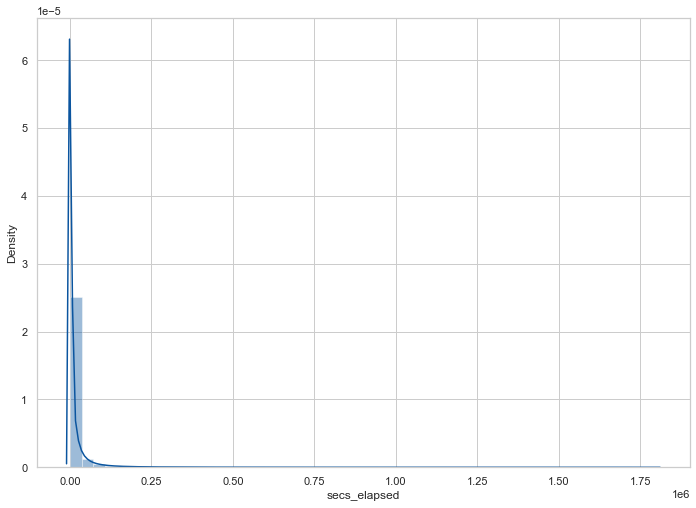

In [23]:
# Analysing the distribution of the secs elapsed
sns.distplot(sessions[sessions['secs_elapsed'].notnull()]['secs_elapsed'])

Since the values are concentrated near 0, i will replace the missing values with the median and check if the stats have changed.

In [24]:
# Replacing the missing values with the median and getting the stats
sessions['secs_elapsed'] = sessions['secs_elapsed'].fillna(
    sessions['secs_elapsed'].median())
sessions['secs_elapsed'].describe()

count   10567737.000000
mean       19170.778001
std        88334.299620
min            0.000000
25%          237.000000
50%         1147.000000
75%         8193.000000
max      1799977.000000
Name: secs_elapsed, dtype: float64

The statistcs were not significantly altered.

#### Actions

In [25]:
# Looking for missing values again
(sessions.isnull().sum() / len(sessions)) * 100

user_id          0.326428
action           0.753482
action_type     20.414721
action_detail   20.414446
device_type      1.999283
secs_elapsed     0.000000
dtype: float64

In [26]:
# Checking how many null actions we have in the dataset
not_null_action = sessions[(sessions['action_type'].notnull()) &
                       (sessions['action_detail'].notnull()) & 
                       (sessions['action'].notnull())]
not_null_action

,user_id,action,action_type,action_detail,device_type,secs_elapsed
1,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,67753.000000
3,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,22141.000000
5,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,7703.000000
7,d1mm9tcy42,personalize,data,wishlist_content_update,Windows Desktop,831.000000
8,d1mm9tcy42,index,view,view_search_results,Windows Desktop,20842.000000
...,...,...,...,...,...,...
10567730,9uqfg8txu3,edit,view,edit_profile,Windows Desktop,1752436.000000
10567731,9uqfg8txu3,edit,view,edit_profile,Windows Desktop,15875.000000
10567732,9uqfg8txu3,dashboard,view,dashboard,Windows Desktop,556.000000
10567733,9uqfg8txu3,edit,view,edit_profile,Windows Desktop,6624.000000


In [27]:
# Visualizing the missing porcentage with this filtered dataset
(not_null_action.isnull().sum() / len(not_null_action)) * 100

user_id         0.338313
action          0.000000
action_type     0.000000
action_detail   0.000000
device_type     1.531365
secs_elapsed    0.000000
dtype: float64

If we have the same users in this dataset and in the train+test dataset, we can use this data to improve the prediction. Let's check.

In [28]:
print('Numer of unique users with recorded action: ', len(not_null_action.user_id.unique()))
print('Number of users to train + predict: ', len(train_users.id.unique()) + len(test_users.id.unique()))

Numer of unique users with recorded action:  133597
Number of users to train + predict:  275547


There are about twice as many users in train+test dataset as in sessions dataset.

This means that if we merge the two datasets we would have 50%+ missing values. Ahead we will decide what will we do about this.

#### Device type

Device type seems ok.

### Train data

In [29]:
# Visualizing data
train_users

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,2010-06-28,20090319043255,NaN,-unknown-,nan,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,820tgsjxq7,2011-05-25,20090523174809,NaN,MALE,38.000000,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.000000,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.000000,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,-unknown-,41.000000,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213446,zxodksqpep,2014-06-30,20140630235636,NaN,MALE,32.000000,basic,0,en,sem-brand,google,omg,Web,Mac Desktop,Safari,NDF
213447,mhewnxesx9,2014-06-30,20140630235719,NaN,-unknown-,nan,basic,0,en,direct,direct,linked,Web,Windows Desktop,Chrome,NDF
213448,6o3arsjbb4,2014-06-30,20140630235754,NaN,-unknown-,32.000000,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,NDF
213449,jh95kwisub,2014-06-30,20140630235822,NaN,-unknown-,nan,basic,25,en,other,other,tracked-other,iOS,iPhone,Mobile Safari,NDF


In [30]:
# Checking types of the columns
train_users.dtypes

id                          object
date_account_created        object
timestamp_first_active       int64
date_first_booking          object
gender                      object
age                        float64
signup_method               object
signup_flow                  int64
language                    object
affiliate_channel           object
affiliate_provider          object
first_affiliate_tracked     object
signup_app                  object
first_device_type           object
first_browser               object
country_destination         object
dtype: object

In [31]:
# Adjusting data type
train_users['date_account_created'] = pd.to_datetime(train_users['date_account_created'])

In [32]:
# Replacing the -unknown- on gender column to np.nan
train_users['gender'].replace('-unknown-', np.nan, inplace=True)

In [33]:
# Looking for missing values
(train_users.isnull().sum() / len(train_users)) * 100

id                         0.000000
date_account_created       0.000000
timestamp_first_active     0.000000
date_first_booking        58.347349
gender                    44.829024
age                       41.222576
signup_method              0.000000
signup_flow                0.000000
language                   0.000000
affiliate_channel          0.000000
affiliate_provider         0.000000
first_affiliate_tracked    2.841402
signup_app                 0.000000
first_device_type          0.000000
first_browser              0.000000
country_destination        0.000000
dtype: float64

#### Age

In [34]:
# Getting the stats
train_users['age'].describe()

count   125461.000000
mean        49.668335
std        155.666612
min          1.000000
25%         28.000000
50%         34.000000
75%         43.000000
max       2014.000000
Name: age, dtype: float64

C:\Users\julio\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


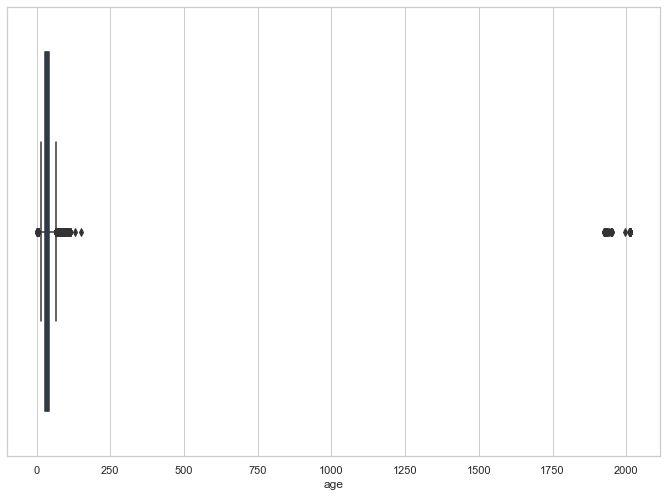

In [35]:
# Looking for outliers
sns.boxplot(train_users['age'])

It seems we have some outliers. I'll start analyzing the ages above 100.

In [36]:
train_users.loc[train_users['age'] > 100]['age'].value_counts()

105.000000     1131
2014.000000     710
110.000000      196
104.000000       48
2013.000000      39
102.000000       34
109.000000       31
103.000000       26
101.000000       23
107.000000       23
106.000000       17
108.000000       15
115.000000       13
113.000000        4
1949.000000       3
1931.000000       3
1932.000000       3
1928.000000       2
1936.000000       2
1929.000000       2
1924.000000       2
1947.000000       2
111.000000        2
1942.000000       1
1926.000000       1
1933.000000       1
112.000000        1
132.000000        1
1952.000000       1
1953.000000       1
1935.000000       1
1938.000000       1
1925.000000       1
1995.000000       1
150.000000        1
2008.000000       1
1927.000000       1
Name: age, dtype: int64

To remove this outliers (that seems wrong), i'll replace every value above 110 years for np.nan.

110 will be used beacouse i don't think people older than this will use airbnb...

C:\Users\julio\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


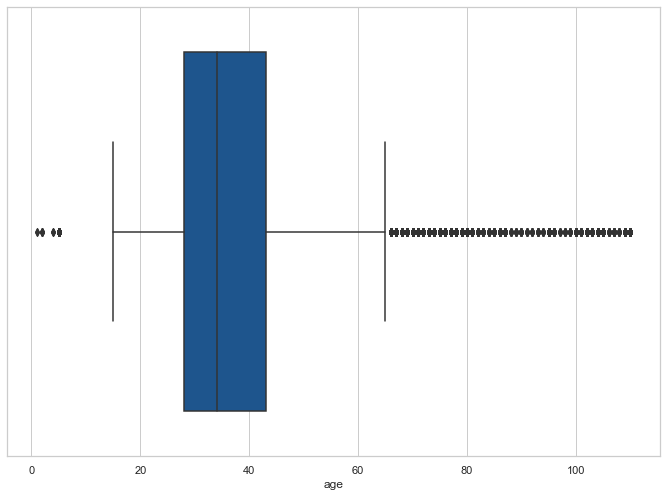

In [37]:
train_users['age'] = train_users['age'].apply(lambda x: np.nan
                                          if x > 110 else x)
sns.boxplot(train_users['age'])

**Now the boxplot looks nicer.**
We can see above that the second quartile is the most concentrated, wich is expected, beacouse it represent ages of paople who would use aribnb.

**The other features will need a deeper understanding of the data. In the next session we will see some statistics.**

## Inferential Statistics

### Gender x first country

**Does the gender of a person affect the first country s/he books an Airbnb in?**

To answer this question we will have to test the relationship between two categorical variables: Gender and Destination Country. We want to know if one feature is independent of ohter by makiing a independence test

Since the number of destination countries is multivariate, the gender is two categorical and we can make a contingency table, we will use the Chi Square Significance Test.


Chi2 from scipy: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2_contingency.html


Before we begin, we will make certain assumptions:
**We will consider only those users who have enlisted their gender as male or female**. Unknown and other genders are not included in this analysis.
**We do not consider users who have never booked an Airbnb or have booked in a country not enlisted as a class (NDF and Other).**

In [38]:
# Visualizing unique values for gender
train_users['gender'].unique()

array([nan, 'MALE', 'FEMALE', 'OTHER'], dtype=object)

In [39]:
# Visualizing unique values for country destination
train_users['country_destination'].unique()

array(['NDF', 'US', 'other', 'FR', 'CA', 'GB', 'ES', 'IT', 'PT', 'NL',
       'DE', 'AU'], dtype=object)

In [40]:
# Selecting the data base on the assumptions
df_inf = train_users[(train_users['country_destination'] != 'NDF') &
                     (train_users['country_destination'] != 'other') &
                     (train_users['gender'] != 'OTHER') &
                     (train_users['gender'].notnull())]

df_inf = df_inf[['id', 'gender', 'country_destination']]

df_inf

,id,gender,country_destination
2,4ft3gnwmtx,FEMALE,US
6,lsw9q7uk0j,FEMALE,US
7,0d01nltbrs,FEMALE,US
8,a1vcnhxeij,FEMALE,US
10,yuuqmid2rp,FEMALE,US
...,...,...,...
213412,a1rvlsdijt,FEMALE,US
213439,msucfwmlzc,MALE,US
213441,omlc9iku7t,FEMALE,ES
213443,0k26r3mir0,FEMALE,US


In [41]:
# Verifying if the new dataset is ok
df_inf['gender'].value_counts()

FEMALE    28833
MALE      24278
Name: gender, dtype: int64

In [42]:
# Verifying if the new dataset is ok
df_inf['country_destination'].value_counts()

US    42151
FR     3297
IT     1790
GB     1563
ES     1530
CA      932
DE      774
NL      532
AU      395
PT      147
Name: country_destination, dtype: int64

**Hypothesis Testing**

For the hypothesis testing, we define the following:


**Null Hypothesis:** There is no relationship between country preference and the sex of the customer.

**Alternate Hypothesis:** There is a relationship between country preference and the sex of the customer.

We will assume our significance level,  α  to be 0.05.

In [43]:
# Adjusting the table for the test
observed = df_inf.pivot_table('id', ['gender'],
                              'country_destination',
                              aggfunc='count').reset_index()
observed.rename_axis(None, axis=1, inplace=True)
observed.set_index('gender', drop=True, inplace=True)
observed

,AU,CA,DE,ES,FR,GB,IT,NL,PT,US
gender,,,,,,,,,,
FEMALE,207,455,358,853,1962,881,1091,254,78,22694
MALE,188,477,416,677,1335,682,699,278,69,19457


In [44]:
table = contingency_tables.Table(observed)
print(table.test_nominal_association())

df          9
pvalue      0.0
statistic   116.87183139602554


Our p-value is less than our chosen significance level. So, the null hypothesis is rejected.

**There is a relationship between country preference and the sex of the customer.**

### Signup Method x Signup Device

**Is the sign up method correlated to the sign up device?**

To answer this question we will have to test the relationship between this two categorical features. We want to know if one feature is independent of ohter by makiing a independence test.

Again we will use the chi2 test and also will use the Two Proportion Z-Test.

In [45]:
# Visualizing the unique values of signup method and it's count
train_users.signup_method.value_counts()

basic       152897
facebook     60008
google         546
Name: signup_method, dtype: int64

In [46]:
# Visualizing the unique values of signup device and it's count
train_users.signup_app.value_counts()

Web        182717
iOS         19019
Moweb        6261
Android      5454
Name: signup_app, dtype: int64

**Criteria:**

- Since google is barely used, compared to basic and facebook sign up, it will be disregarded.

- We will also consider IOs, Moweb and Android to all be of the Mobile Device Type.

In [47]:
# Filtering the dataset
signup_pref = train_users[(train_users['signup_method'] != 'google')][[
    'id', 'signup_method', 'signup_app'
]]
signup_pref['device'] = signup_pref['signup_app'].apply(
    lambda x: 'Computer' if x == 'Web' else 'Mobile')
signup_pref

,id,signup_method,signup_app,device
0,gxn3p5htnn,facebook,Web,Computer
1,820tgsjxq7,facebook,Web,Computer
2,4ft3gnwmtx,basic,Web,Computer
3,bjjt8pjhuk,facebook,Web,Computer
4,87mebub9p4,basic,Web,Computer
...,...,...,...,...
213446,zxodksqpep,basic,Web,Computer
213447,mhewnxesx9,basic,Web,Computer
213448,6o3arsjbb4,basic,Web,Computer
213449,jh95kwisub,basic,iOS,Mobile


In [48]:
# Verifying the results
signup_pref['device'].value_counts()

Computer    182717
Mobile       30188
Name: device, dtype: int64

**Hypothesis Testing**

For the hypothesis testing, we define the following:

- Null Hypothesis: There is no relationship between device type and signup method.

- Alternate Hypothesis: There is a relationship between device type and signup method.

We will assume our significance level, α to be 0.05.

In [49]:
# Creating contingency table
signup_pref = signup_pref.pivot_table('id', ['device'],
                                      'signup_method',
                                      aggfunc='count')
signup_pref.index = ['Computer', 'Mobile']
signup_pref.columns = ['Basic', 'Facebook']
signup_pref

,Basic,Facebook
Computer,131237,51480
Mobile,21660,8528


#### Chi Square Test

In [50]:
table = contingency_tables.Table(signup_pref)
print(table.test_nominal_association())

df          1
pvalue      0.7886788661023729
statistic   0.07183824273422046


Our p-value is higher than the assumed α, so the null hypotesis is **not rejected** and **there is no relationship between device type and signup method**.

We will now use the same criteria and hypotesis to perdorm a Z-Test and compare the results.

#### Z-Test

In [51]:
table = contingency_tables.Table(signup_pref)
print(table.test_ordinal_association())

null_mean   8508.59070477443
null_sd     72.41573378014986
pvalue      0.7886793506128
statistic   8528.0
zscore      0.2680259414963062


Our p-value is also higher than the assumed α, so the null hypotesis again is **not rejected** and **there is no relationship between device type ans signup method**.

### Conclusions

- There is a relationship between gender and Airbnb Country Destination. In other words, the gender influences your country of choice.

- There is no relationship between device type and signup method. The two variables are independent of each other.

## Exploratory Data Analysis

In this section we will use some datavis to get insights.

### Countries

#### Population

Text(0, 0.5, 'Mean Age')

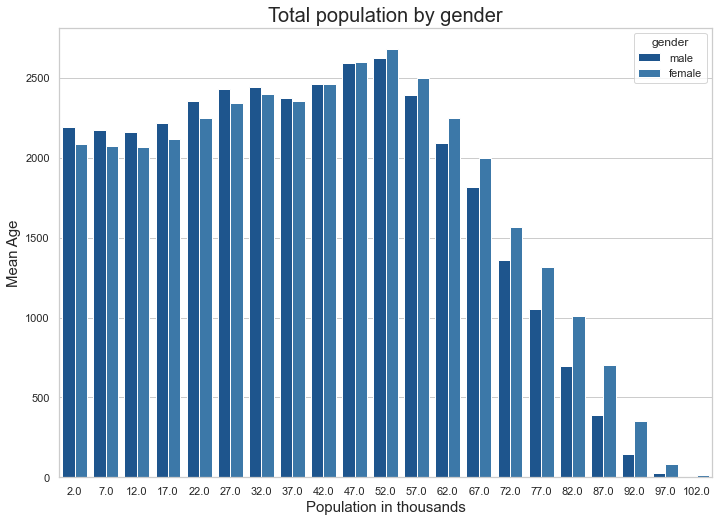

In [52]:
# Visualizing the population by gender
sns.barplot(x='age_mean',
            y='population_in_thousands',
            hue='gender',
            data=countries_info,
            ci=None)
plt.title('Total population by gender', size=20)
plt.xlabel("Population in thousands", size=15)
plt.ylabel("Mean Age", size=15)

Above we can observe that:
- The largest groups are with mean ages of 47 and 52 years;
- The female population lives more then the male population;
- The population starts to decrease on groups are with mean ages of 57;
- The middle aged people is the largest population.

C:\Users\julio\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Population in thousands')

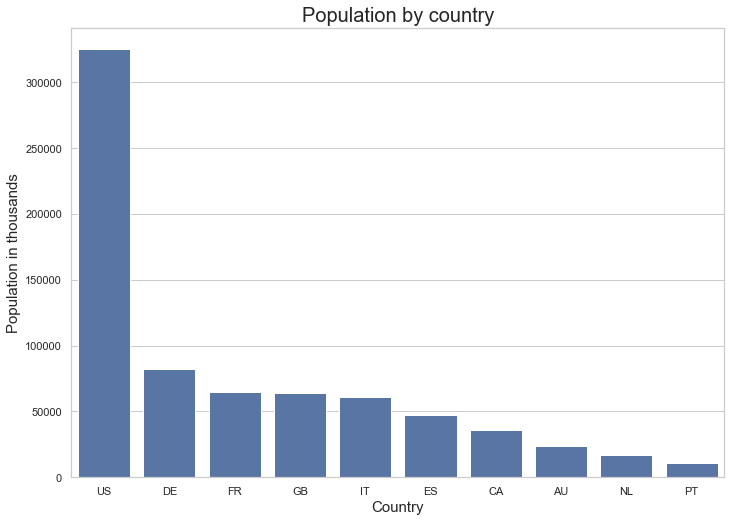

In [53]:
# Creating a visualization to the dataset above
sns.barplot(population['country_destination'],
            population['population_in_thousands'],
            color='b')
plt.title('Population by country', size=20)
plt.xlabel("Country", size=15)
plt.ylabel("Population in thousands", size=15)

Above we can observe that:
- US has by far the largest population compared to the other countries;
- US is the only country with population higher then 100 milion;
- US influences a lot on the previous visualization.

C:\Users\julio\anaconda3\lib\site-packages\seaborn\axisgrid.py:645: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


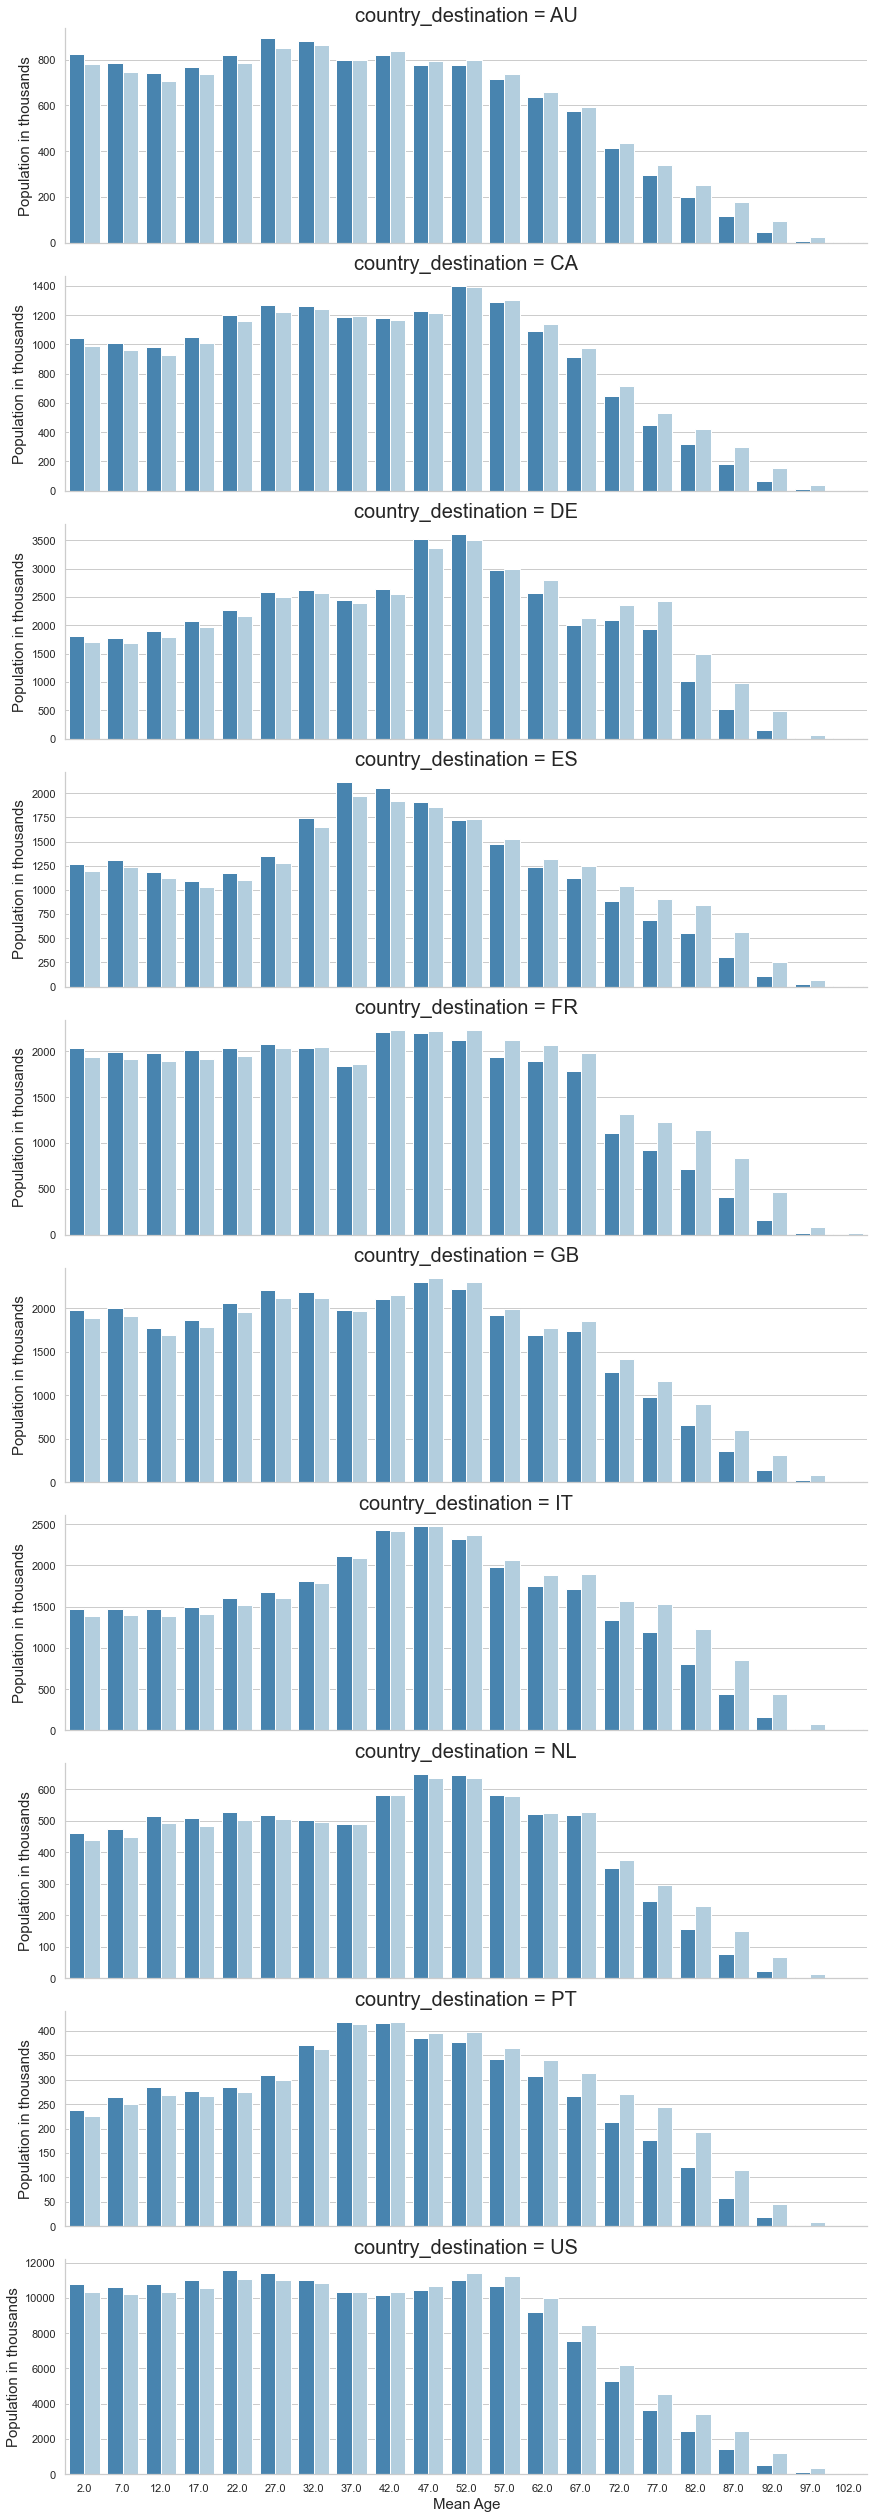

In [54]:
# Visualizing the distribution of the population by country and by gender
fig = sns.FacetGrid(countries_info,
                    row="country_destination",
                    height=3.5,
                    aspect=3.5,
                    sharey=False)
fig.map(sns.barplot,
        "age_mean",
        "population_in_thousands",
        hue=countries_info['gender'],
        palette='Blues_r')
fig.set_titles(size=20)
fig.set_axis_labels("Mean Age", "Population in thousands", size=15)
fig

Above we can observe that:
- In all countries the female population lives more then the male population;
- In US and AU the young people is the largest population.

#### Distance

Text(0, 0.5, 'Distance (km)')

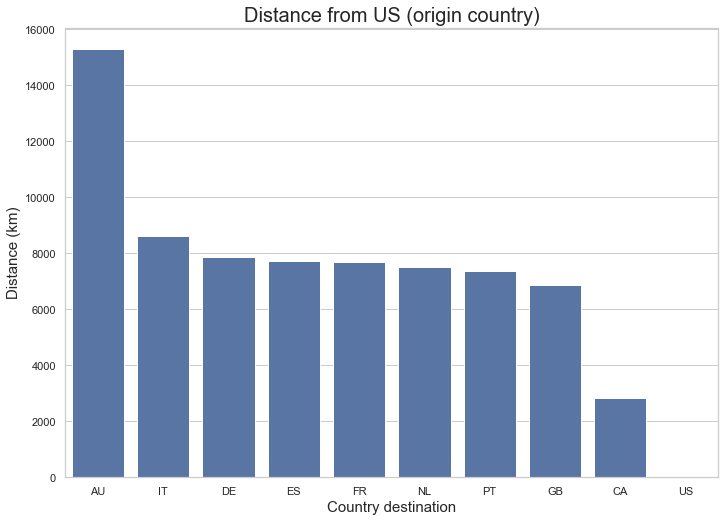

In [55]:
# Distance between the country and US
sns.barplot(x='country_destination',
            y='distance_km',
            data=countries.sort_values('distance_km', ascending=False),
            color='b')
plt.title('Distance from US (origin country)', size=20)
plt.xlabel("Country destination", size=15)
plt.ylabel("Distance (km)", size=15)

This graph alone doesn't tell a lot.


To improve our insights we will now verify the correlation between:
- Visit count x Distance
- Visit count x Language Levenshtein Distance
- Visit count x Area

#### Popularity

In [56]:
# Getting the visit count of each country
country_popularity = train_users[(train_users['country_destination'] != 'NDF')
                                 &
                                 (train_users['country_destination'] != 'other'
                                  )]['country_destination'].value_counts()
country_popularity

US    62376
FR     5023
IT     2835
GB     2324
ES     2249
CA     1428
DE     1061
NL      762
AU      539
PT      217
Name: country_destination, dtype: int64

Since US have a lot more visits then the others, we will make the study with US and without US.

In [57]:
# Getting the other infos and creating the dataset
countries_vis = countries[[
    'country_destination', 'distance_km',
    'destination_km2', 'language_levenshtein_distance'
]].set_index('country_destination', drop=True)

countries_vis['count'] = country_popularity


countries_vis

,distance_km,destination_km2,language_levenshtein_distance,count
country_destination,,,,
AU,15297.744000,7741220.000000,0.000000,539
CA,2828.133300,9984670.000000,0.000000,1428
DE,7879.568000,357022.000000,72.610000,1061
ES,7730.724000,505370.000000,92.250000,2249
FR,7682.945000,643801.000000,92.060000,5023
GB,6883.659000,243610.000000,0.000000,2324
IT,8636.631000,301340.000000,89.400000,2835
NL,7524.320300,41543.000000,63.220000,762
PT,7355.253400,92090.000000,95.450000,217


In [58]:
# Correlations with US
countries_vis.corr()

,distance_km,destination_km2,language_levenshtein_distance,count
distance_km,1.000000,-0.325407,0.199798,-0.648464
destination_km2,-0.325407,1.000000,-0.767175,0.538990
language_levenshtein_distance,0.199798,-0.767175,1.000000,-0.378198
count,-0.648464,0.538990,-0.378198,1.000000


In [59]:
# Correlations without US
countries_vis.drop('US').corr()

,distance_km,destination_km2,language_levenshtein_distance,count
distance_km,1.000000,0.048063,-0.078441,-0.175945
destination_km2,0.048063,1.000000,-0.715772,-0.257295
language_levenshtein_distance,-0.078441,-0.715772,1.000000,0.284239
count,-0.175945,-0.257295,0.284239,1.000000


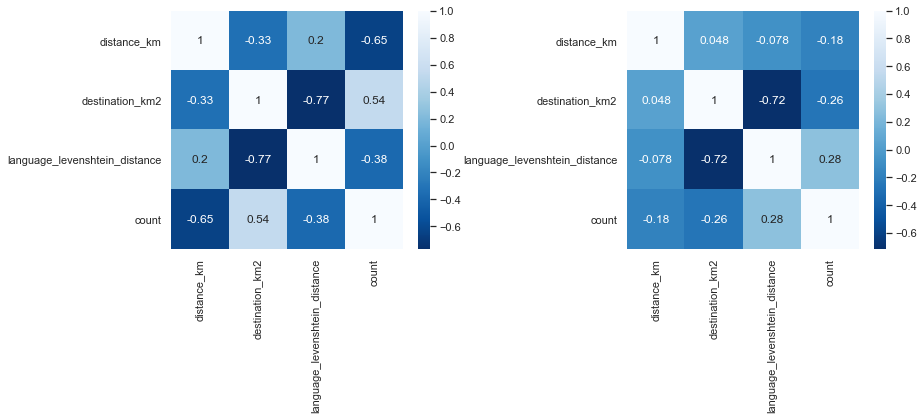

In [60]:
# Correlation plot on a heatmap
fig, (ax1, ax2) = plt.subplots(1, 2, tight_layout=True, figsize=(13,6))
sns.heatmap(countries_vis.corr(), annot=True, ax=ax1, cmap='Blues_r')
sns.heatmap(countries_vis.drop('US').corr(), annot=True, ax=ax2, cmap='Blues_r')

**Count x Distance**
- There is a strong negative correlation of **-0.65**;
- This correlation changes to **-0.18 without US.**;
- The correlation dropped, but is still **negative**.


**Count x Language Levenshtein Distance**
- There is a negative correlation of **-0.38**;
- This correlation changes to **0.28 withou US**;
- This might suggest that there is a preference in countries with a different language (and therefore culture) while travelling outside US.

**Count x Area**
- There is a positve correlation of **0.54**;
- This correlation changes to **-0.26 without US**
- This might suggest that there is a preference in smaler countries.


**Conclusions**
- We cannot assume that this correlations are in accordance with reality beacouse we have few data.
- The correlation between visit count, Language Levenshtein Distance and Area can be explained by the fact that europe has strong tourism and their countries are small and the language is different.
- The distance can be explained by the same reason as above.


### Session

#### Secs elapsed

C:\Users\julio\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


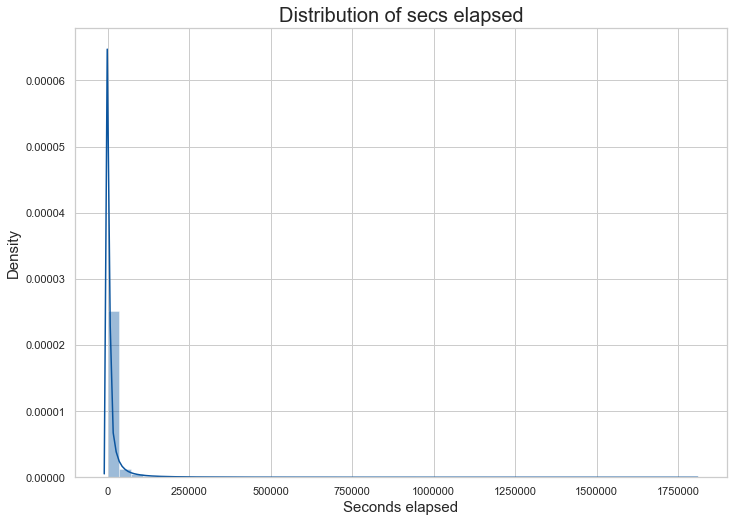

In [61]:
# Visualizing the distribution of secs elapsed
sns.distplot(sessions['secs_elapsed'])
plt.title('Distribution of secs elapsed', size=20)
plt.xlabel("Seconds elapsed", size=15)
plt.ylabel('Density', size=15)
plt.ticklabel_format(style='plain', axis='y')
plt.ticklabel_format(style='plain', axis='x')

This data is too concentraded on the smaller values, but it has some outliers that harm our visualization.
To analyze with more precision we will select only the values that are under 5000.

C:\Users\julio\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


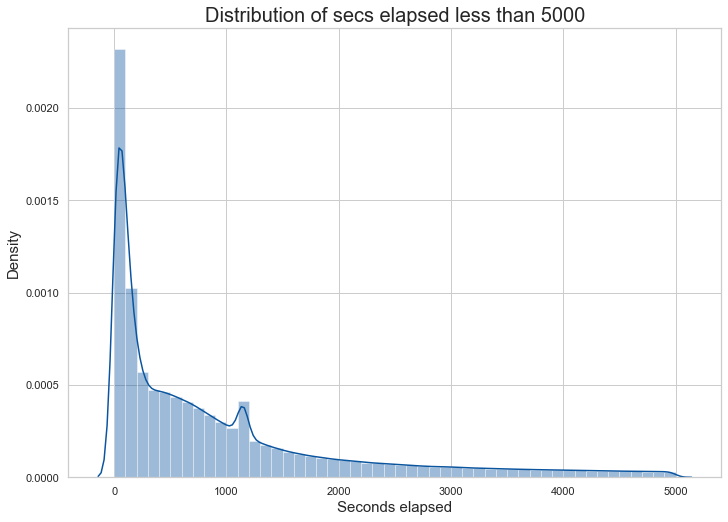

In [62]:
# Visualizing secs elapsed with filter
sns.distplot(sessions[(sessions['secs_elapsed'].notnull())
                    & (sessions['secs_elapsed'] < 5000)]['secs_elapsed'])
plt.title('Distribution of secs elapsed less than 5000', size=20)
plt.xlabel("Seconds elapsed", size=15)
plt.ylabel('Density', size=15)
plt.ticklabel_format(style='plain', axis='y')
plt.ticklabel_format(style='plain', axis='x')

In [63]:
# Visualizing the statistics
sessions.describe()

,secs_elapsed
count,10567737.000000
mean,19170.778001
std,88334.299620
min,0.000000
25%,237.000000
50%,1147.000000
75%,8193.000000
max,1799977.000000


We can see thar after about 1000 secs, the value decreases exponentialy.
Visualizing the percentiles we can afirm that secs smaller then 1147 represents 50% of the data.

#### Actions

In [64]:
# Constructing a function to make plots
def plots(df, column, title1, ylabel1, xlabel1, title2, ylabel2, xlabel2,
          title3, ylabel3, xlabel3, min_count):
    # Preparations
    top = df.loc[df[column].isin(df[column].value_counts()[:20].index)]
    time_spent = df[[column, 'secs_elapsed']].groupby(column,
                                                      as_index=False).sum()
    time_spent['min_elapsed'] = time_spent['secs_elapsed'] / 60
    time_spent.set_index(column, drop=True, inplace=True)
    time_spent['count'] = df[column].value_counts()
    time_spent[
        'mean_minutes'] = time_spent['min_elapsed'] / time_spent['count']
    time_spent_top = time_spent.sort_values('min_elapsed',
                                            ascending=False).iloc[:20]

    mean_time_spent_action_count100 = time_spent.loc[
        time_spent['count'] > min_count].sort_values('mean_minutes',
                                                      ascending=False)
    mean_time_spent_action_count100 = mean_time_spent_action_count100.sort_values(
        'mean_minutes', ascending=False).iloc[:20]

    # Plots
    fig, (ax1, ax2, ax3) = plt.subplots(3,
                                        1,
                                        tight_layout=True,
                                        figsize=(13, 13))
    # Plot 1
    plot1 = sns.countplot(x=column,
                          data=top,
                          order=top[column].value_counts().index,
                          color='b',
                          ax=ax1)
    ax1.set_title(title1, size=20)
    ax1.set_ylabel(ylabel1, size=15)
    ax1.set_xlabel(xlabel1)
    ax1.set_xticklabels(top[column].value_counts().index, rotation=90)
    ax1.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
    # Plot 2
    plot2 = sns.barplot(x=time_spent_top.index,
                        y='min_elapsed',
                        data=time_spent_top,
                        color='b',
                        ci=False,
                        ax=ax2)
    ax2.set_title(title2, size=20)
    ax2.set_ylabel(ylabel2, size=15)
    ax2.set_xlabel(xlabel2)
    ax2.set_xticklabels(time_spent_top.index, rotation=90)
    ax2.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
    # Plot 3
    plot3 = sns.barplot(x=mean_time_spent_action_count100.index,
                        y='mean_minutes',
                        data=mean_time_spent_action_count100,
                        color='b',
                        ci=False,
                        ax=ax3)
    ax3.set_title(title3, size=20)
    ax3.set_ylabel(ylabel3, size=15)
    ax3.set_xlabel(xlabel3)
    ax3.set_xticklabels(mean_time_spent_action_count100.index, rotation=90)
    ax3.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
    # Show Plot
    plt.show()

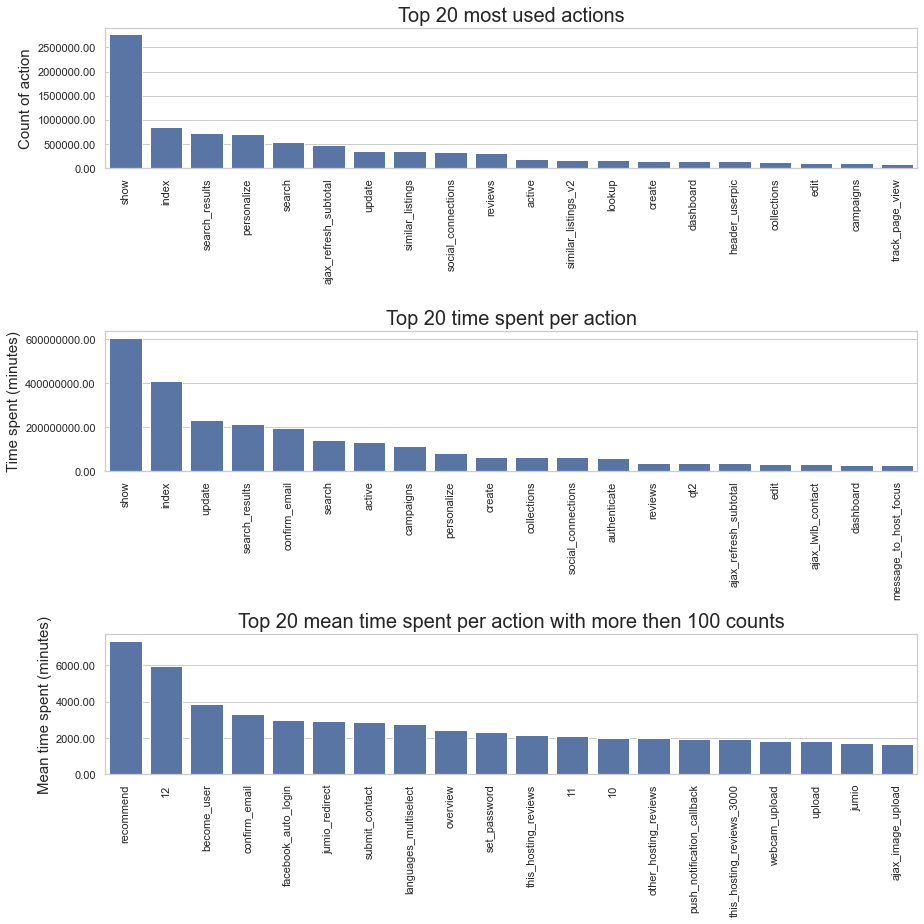

In [65]:
plots(sessions, 'action', 'Top 20 most used actions', 'Count of action', '',
      'Top 20 time spent per action', 'Time spent (minutes)', '',
      'Top 20 mean time spent per action with more then 100 counts',
      'Mean time spent (minutes)', '', 100)

In the first graph we verify that the most used actions are the ones related to search places.

In the second graph, when we verified the time spent on each action, we can see that the users spend a lot of time searching and looking at places to stay, but we can also see that some configuration related actions starts to appear.

The third graph was created by dividing the time spent in each action by it's count. In this graph we can see that the actions the the users take longer are the login and recommendation related. This information raises a question: why does it take longer to use these actions? Were this expected?
Can the login process be improved? The recomendations seems something important to the users. How can this experience be improved?

#### Action types

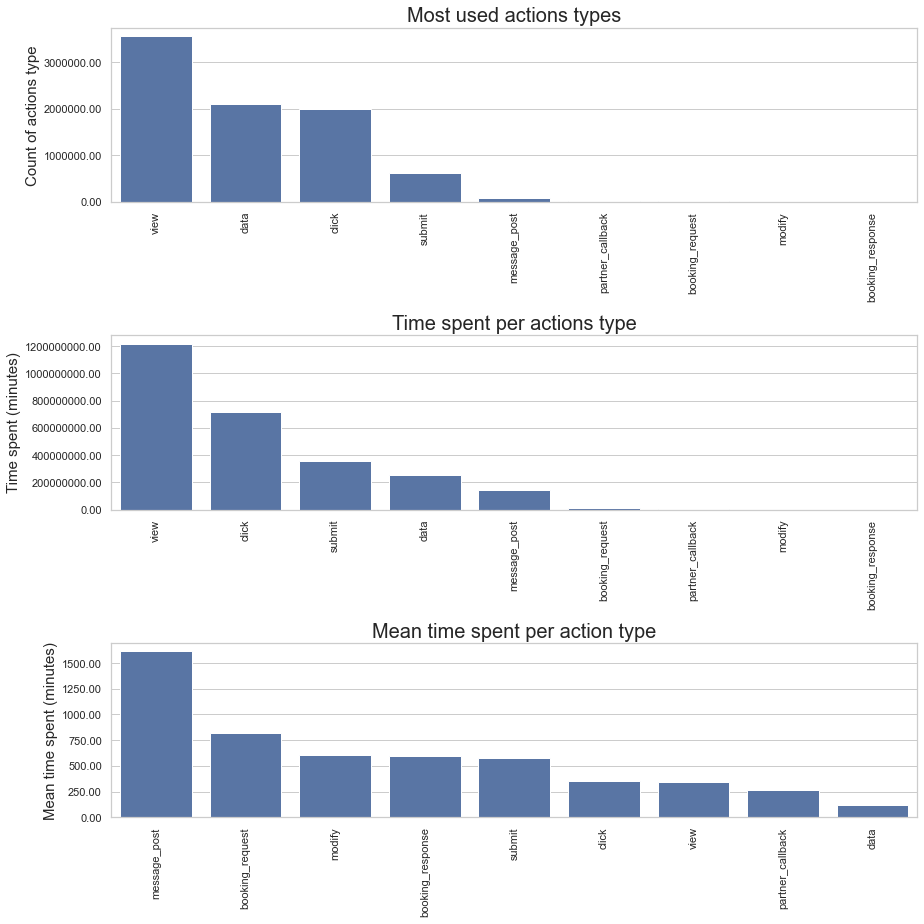

In [66]:
plots(sessions, 'action_type', 'Most used actions types',
      'Count of actions type', '', 'Time spent per actions type',
      'Time spent (minutes)', '', 'Mean time spent per action type',
      'Mean time spent (minutes)', '', 0)

The less used action types are the ones that the users take more time to complete in mean. Was this expected?

#### Action details

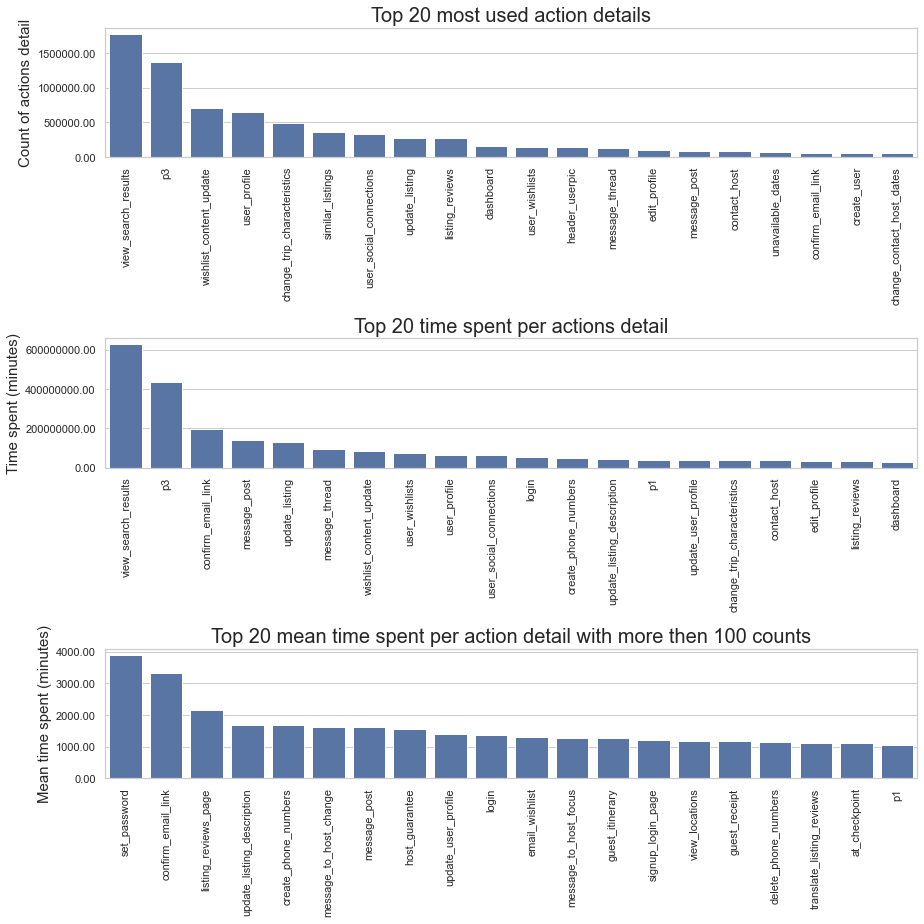

In [67]:
plots(sessions, 'action_detail', 'Top 20 most used action details', 'Count of actions detail', '',
      'Top 20 time spent per actions detail', 'Time spent (minutes)', '',
      'Top 20 mean time spent per action detail with more then 100 counts',
      'Mean time spent (minutes)', '', 100)

Here we can see a conclusion similar to the one in "Actions".

#### Device types

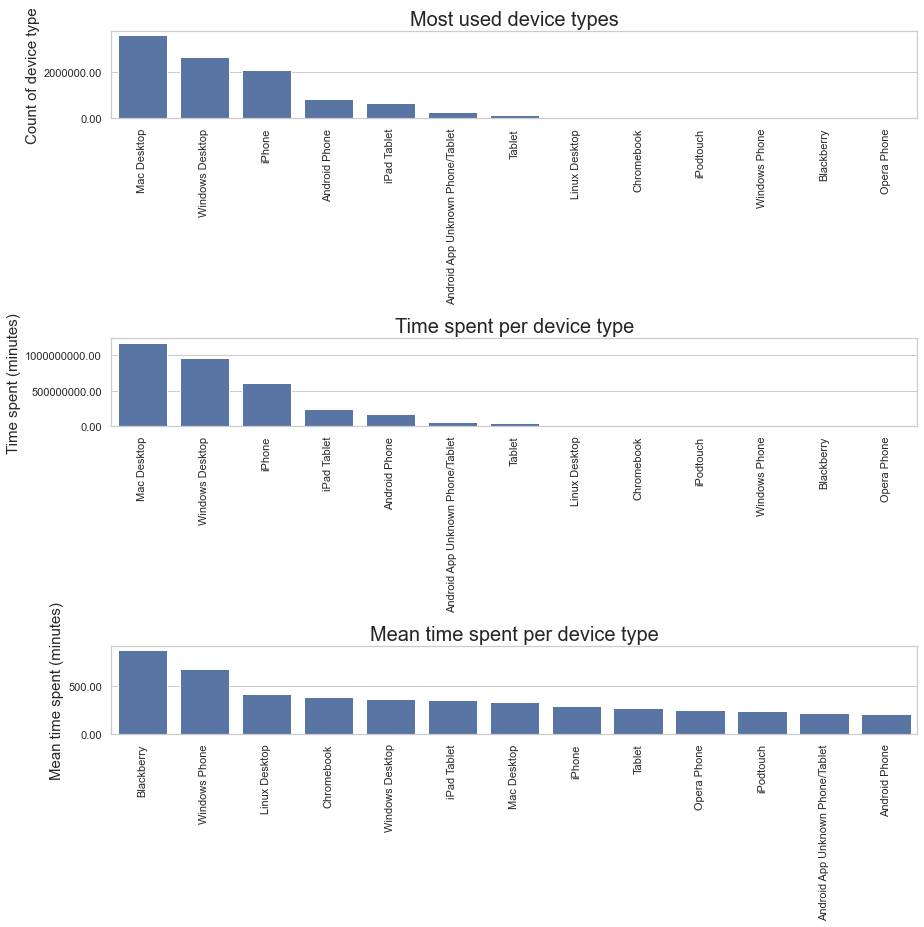

In [68]:
plots(sessions, 'device_type', 'Most used device types',
      'Count of device type', '', 'Time spent per device type',
      'Time spent (minutes)', '', 'Mean time spent per device type',
      'Mean time spent (minutes)', '', 0)

With the first two graphs we can get some insights of the target audience of the product. And comparing them to the third, we can verify in wich plataform the app still doesn't have a very good experience.

### Train users

In [69]:
def stacked_bar(feature):
    ctab = pd.crosstab([train_users[feature].fillna('Unknown')],
                       train_users.country_destination,
                       dropna=False).apply(lambda x: x / x.sum(), axis=1)
    ctab = ctab[list(ctab.iloc[0].sort_values(ascending=False).index)]
    ctab.plot(kind='bar', stacked=True, colormap='terrain', legend=True)
    plt.legend(loc='upper left')

#### Country destination

Text(0, 0.5, 'Percentage')

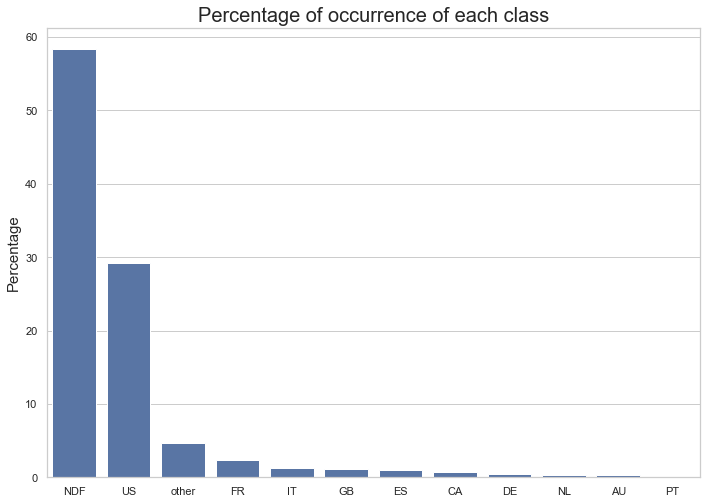

In [70]:
# Plotting the target feature ocurrance in percentage
percentage_ocurrence_class = (
    train_users['country_destination'].value_counts() / len(train_users)) * 100
sns.barplot(x=percentage_ocurrence_class.index,
            y=percentage_ocurrence_class.values,
            color='b')
plt.title('Percentage of occurrence of each class', size=20) 
plt.xlabel('', size=15)
plt.ylabel('Percentage', size=15)

- Almost 60% of our users in study have never booked and Airbnb
- Almost 30% of our users in study choose their own country for his first airbnb.

#### Gender

C:\Users\julio\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Count')

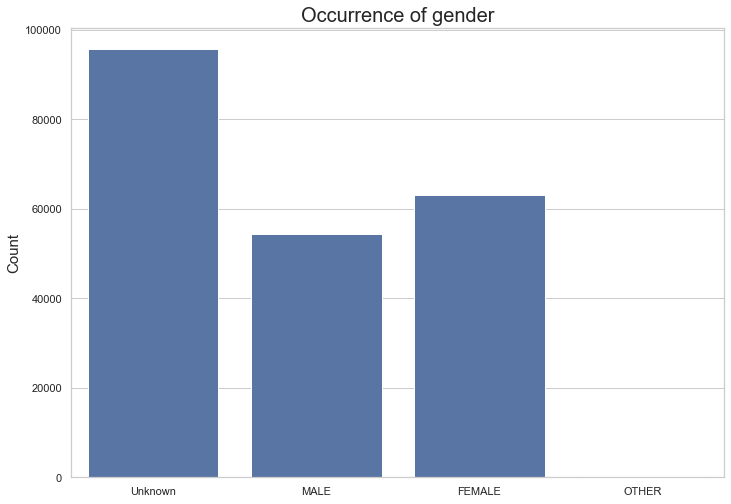

In [71]:
sns.countplot(train_users['gender'].fillna('Unknown'), color='b')
plt.title('Occurrence of gender', size=20) 
plt.xlabel('', size=15)
plt.ylabel('Count', size=15)

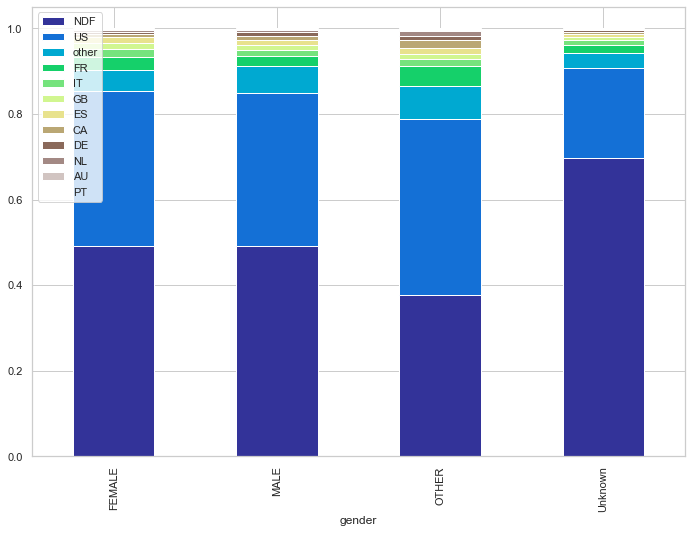

In [72]:
stacked_bar('gender')

- The majority of the data is null
- There are more female then male on the known data

#### Age

C:\Users\julio\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Density')

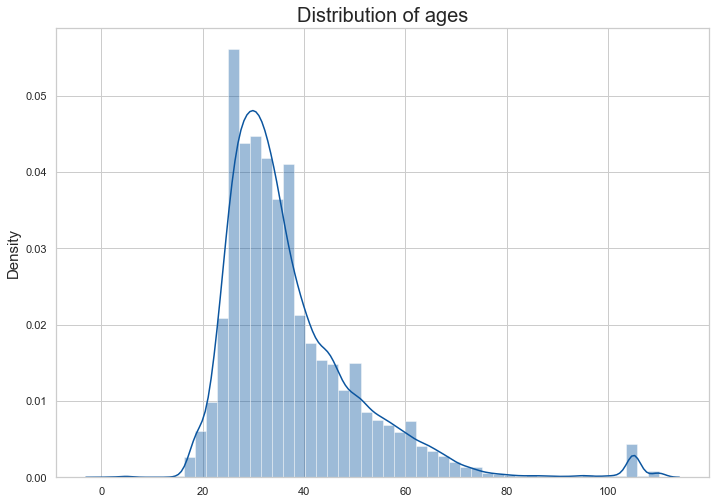

In [73]:
sns.distplot(train_users['age'].dropna())
plt.title('Distribution of ages', size=20) 
plt.xlabel('', size=15)
plt.ylabel('Density', size=15)

The largest part of users of Airbnb have ages between 20 and 40.

This raises a question: are some age groups more likely to book in a specific country? For that we will make a box plot  for each country destination.

Text(0, 0.5, 'Age')

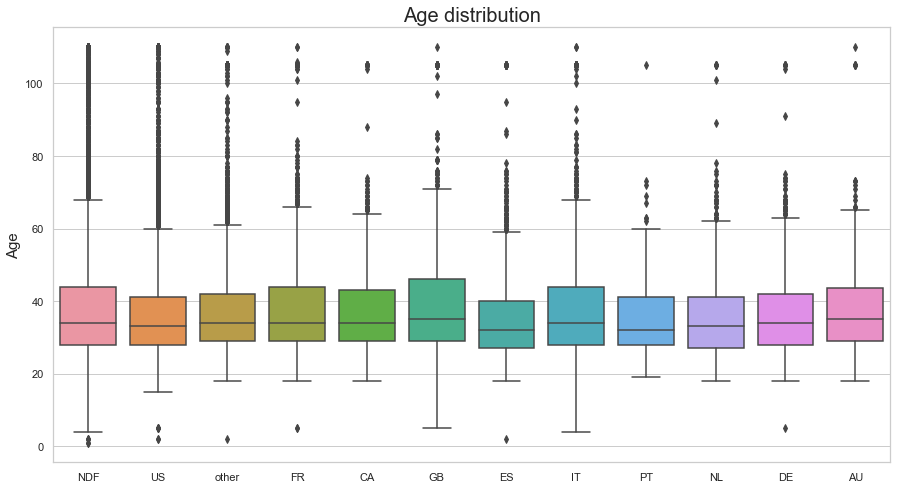

In [74]:
_, ax = plt.subplots(nrows=1, ncols=1,figsize=(15, 8))
sns.boxplot(x='country_destination', y='age', data=train_users, ax=ax)
plt.title('Age distribution', size=20) 
plt.xlabel('', size=15)
plt.ylabel('Age', size=15)

- Great Britain has the higher median;
- Espain has the lowest median;
- Espain has the lowest quartiles;

Now we will define a new feature age_group to group our users into 4 Age Groups:

- People younger than 40 are labelled as young.
- People aged between 40 and 60 years are labelled as middle aged.
- People aged greater than 60 years are labelled old.
- People with unknown ages are labelled unknown.

In [75]:
# Defining age groups
def set_age_group(x):
    if x < 40:
        return 'Young'
    elif x >=40 and x < 60:
        return 'Middle'
    elif x >= 60 and x <= 125:
        return 'Old'
    else:
        return 'Unknown'
train_users['age_group'] = train_users['age'].apply(set_age_group)

C:\Users\julio\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Count')

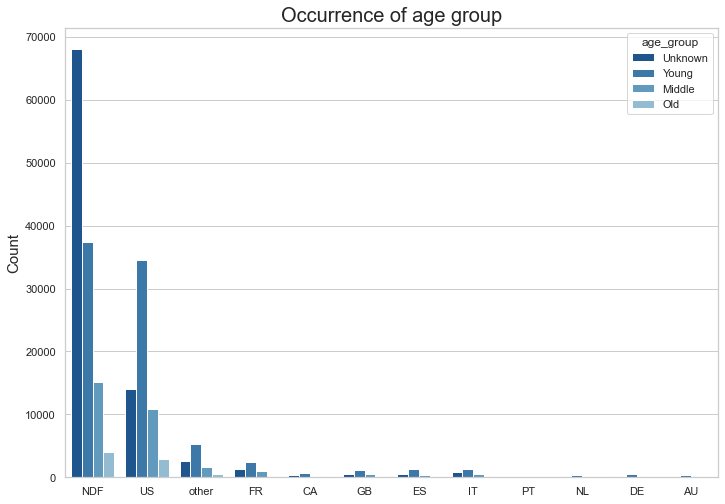

In [76]:
sns.countplot(train_users['country_destination'],
              hue=train_users['age_group'])
plt.title('Occurrence of age group', size=20)
plt.xlabel('', size=15)
plt.ylabel('Count', size=15)

Since we can't see nothing from the countries that have lower number os visitors from airbnb, we will convert this values to percentage so the bars have tha same size.

C:\Users\julio\anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


Text(0, 0.5, 'Percentage')

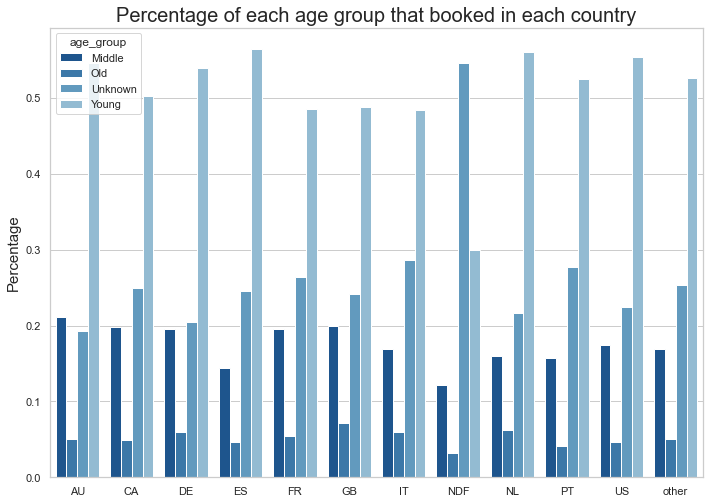

In [77]:
percentage = train_users.groupby(['country_destination', 'age_group'],
                                 as_index=False).size()
percentage = percentage.reset_index()
percentage.columns = ['country_destination', 'age_group', 'count']

totals = percentage.groupby('country_destination', as_index=False).sum()

percentage['percentage_in_country'] = 0
for i in range(len(percentage)):
    percentage['percentage_in_country'].iloc[
        i] = percentage.iloc[i]['count'] / totals['count'].loc[
            totals['country_destination'] == percentage.iloc[i]
            ['country_destination']].values

sns.barplot(x=percentage['country_destination'],
            y=percentage['percentage_in_country'],
            hue=percentage['age_group'])
plt.title('Percentage of each age group that booked in each country', size=20)
plt.xlabel('', size=15)
plt.ylabel('Percentage', size=15)

Text(0, 0.5, 'Percentage')

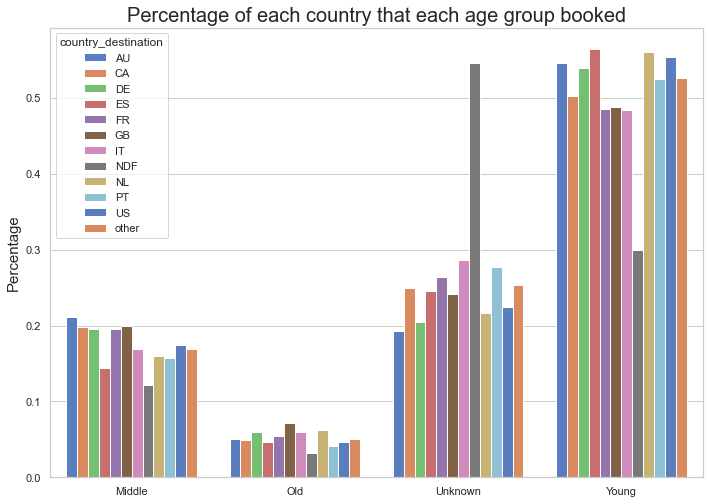

In [78]:
sns.barplot(x=percentage['age_group'],
            y=percentage['percentage_in_country'],
            hue=percentage['country_destination'],
            palette='muted')
plt.title('Percentage of each country that each age group booked', size=20)
plt.xlabel('', size=15)
plt.ylabel('Percentage', size=15)

C:\Users\julio\anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


Text(0, 0.5, 'Percentage')

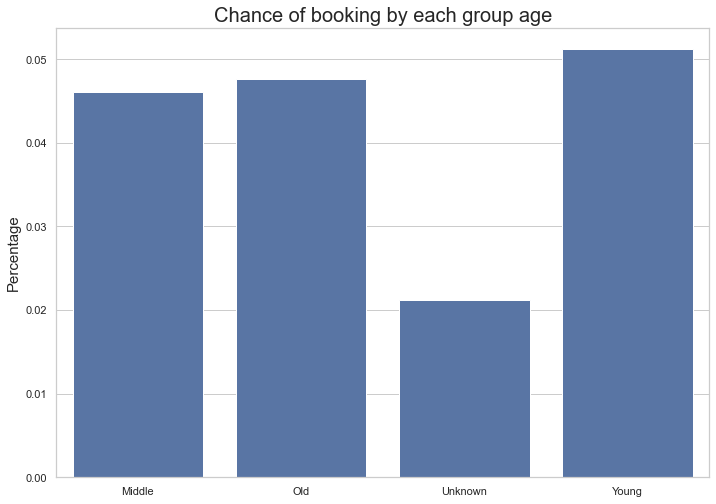

In [79]:
percentage = train_users.groupby(['country_destination', 'age_group'],
                                 as_index=False).size()
percentage = percentage.reset_index()
percentage.columns = ['country_destination', 'age_group', 'count']

totals = percentage.groupby('age_group', as_index=False).sum()

percentage['percentage_by_age'] = 0
for i in range(len(percentage)):
    percentage['percentage_by_age'].iloc[i] = percentage.iloc[i]['count'] / totals[
        'count'].loc[totals['age_group'] == percentage.iloc[i]
                     ['age_group']].values

sns.barplot(x=percentage['age_group'].loc[percentage['country_destination'] != 'NDF'],
            y=percentage['percentage_by_age'], ci=False, color='b')

plt.title('Chance of booking by each group age', size=20)
plt.xlabel('', size=15)
plt.ylabel('Percentage', size=15)

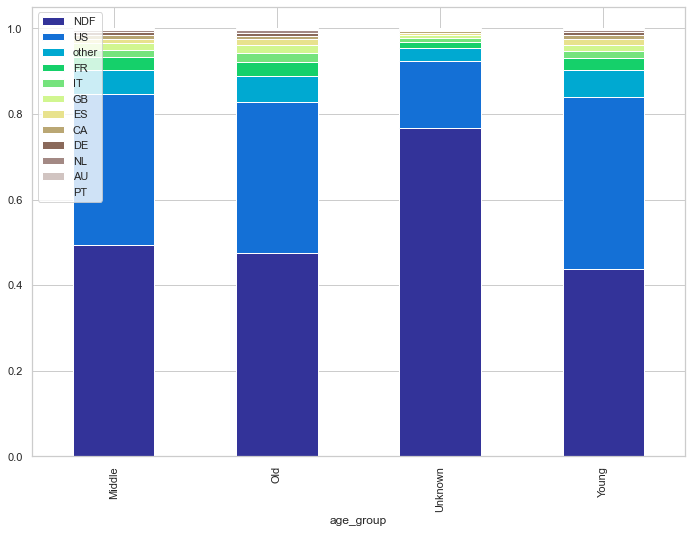

In [80]:
stacked_bar('age_group')

- The only category that unknown age is the highest is NDF. This means that users who enters their age are more likely to book an Airbnb.
- Middle Aged People are less likely to book an Airbnb.

#### Signup Method

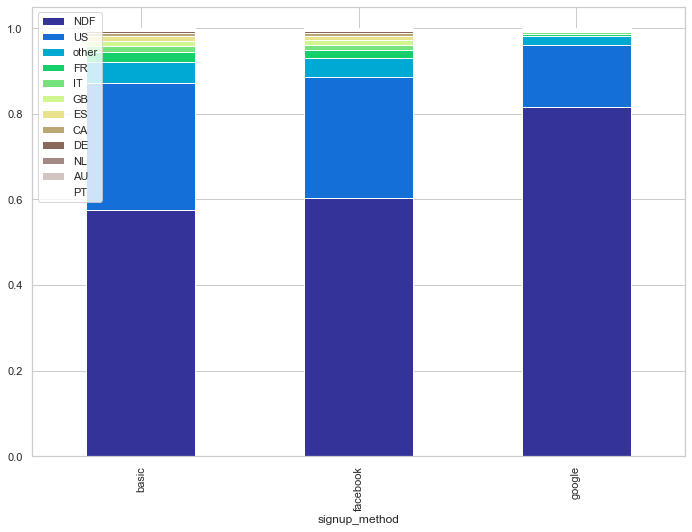

In [81]:
stacked_bar('signup_method')

C:\Users\julio\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Count')

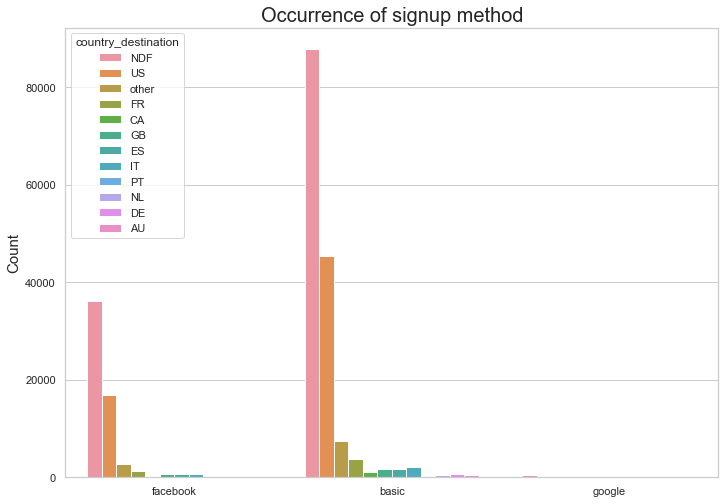

In [82]:
sns.countplot(train_users['signup_method'], hue=train_users['country_destination'])
plt.title('Occurrence of signup method', size=20) 
plt.xlabel('', size=15)
plt.ylabel('Count', size=15)

- People who uses Google Signup are least likely to book an airbnb

#### Language

Text(0, 0.5, 'Percentage')

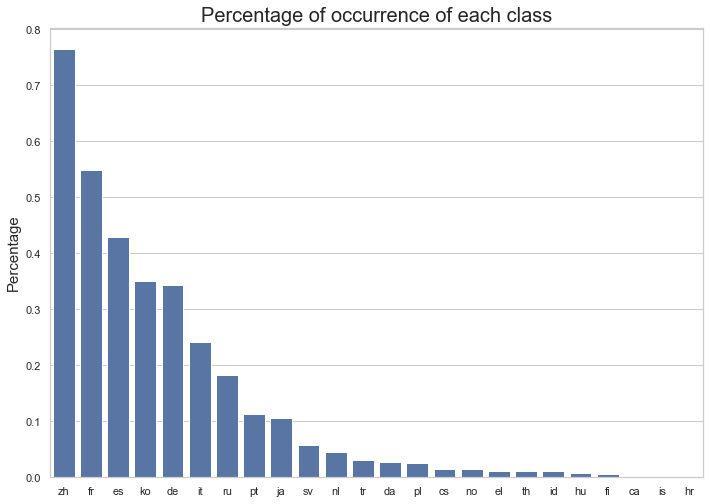

In [83]:
# Plotting the target feature ocurrance in percentage
percentage_ocurrence_class = (train_users['language'].value_counts() /
                              len(train_users)) * 100
percentage_ocurrence_class.drop('en', inplace=True)

sns.barplot(x=percentage_ocurrence_class.index,
            y=percentage_ocurrence_class.values,
            color='b', )

plt.title('Percentage of occurrence of each class', size=20)
plt.xlabel('', size=15)
plt.ylabel('Percentage', size=15)

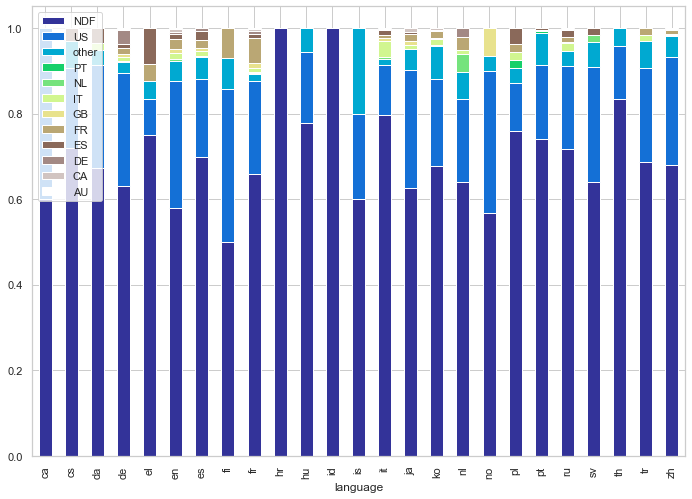

In [84]:
stacked_bar('language')

- People who speak Hungarian and Indonesian made almost no bookings;
- People who speak Finnish made the most bookings;

#### Affiliate Channels and Providers

C:\Users\julio\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Count')

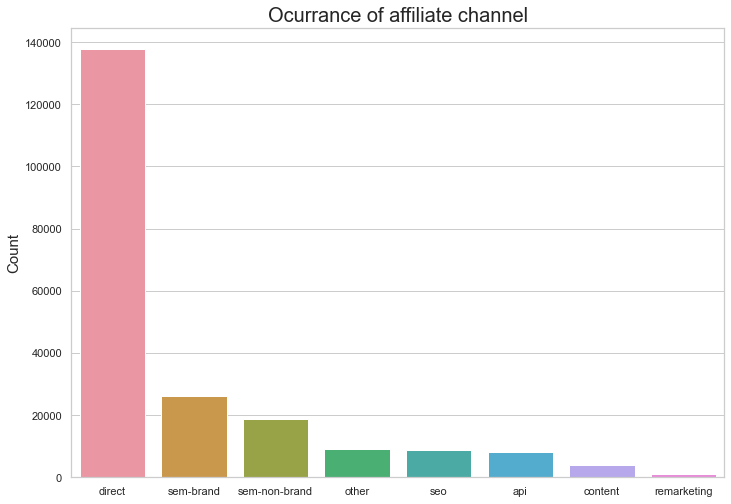

In [85]:
sns.countplot(train_users['affiliate_channel'],
              order=train_users['affiliate_channel'].value_counts().index)
plt.title('Ocurrance of affiliate channel', size=20)
plt.xlabel('', size=15)
plt.ylabel('Count', size=15)

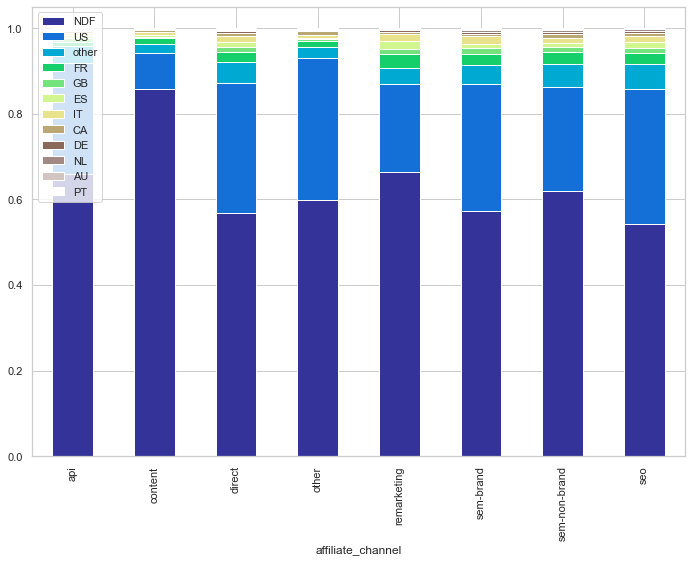

In [86]:
stacked_bar('affiliate_channel')

C:\Users\julio\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Count')

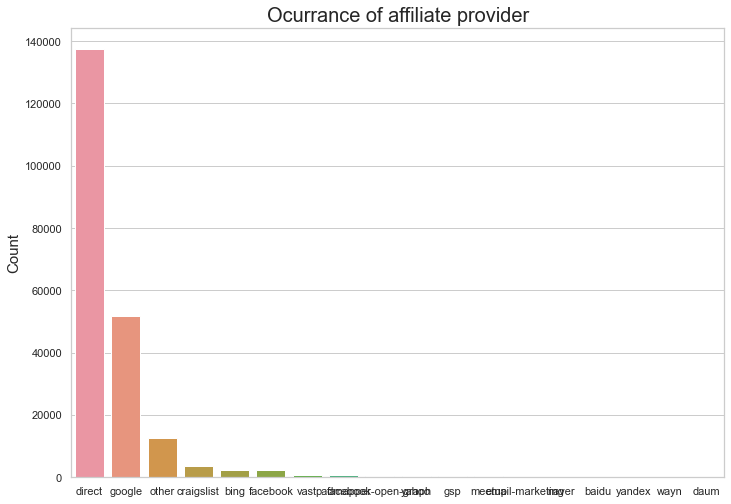

In [87]:
sns.countplot(train_users['affiliate_provider'],
              order=train_users['affiliate_provider'].value_counts().index)
plt.title('Ocurrance of affiliate provider', size=20)
plt.xlabel('', size=15)
plt.ylabel('Count', size=15)

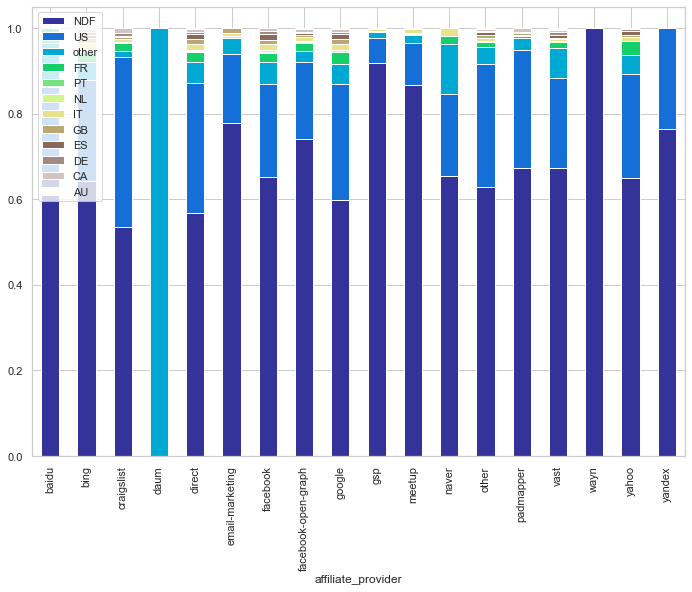

In [88]:
stacked_bar('affiliate_provider')

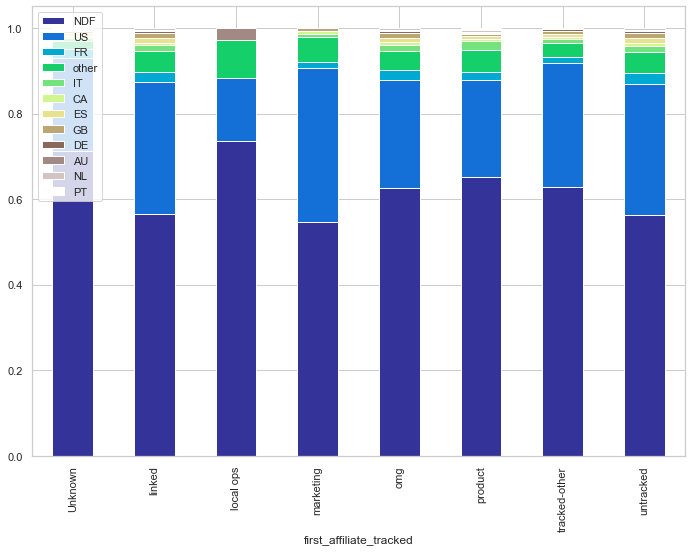

In [89]:
stacked_bar('first_affiliate_tracked')

- The Direct Channel has the most number of conversions;
- Direct and Google are the most popular affiliate providers.
- Marketing afilliates were most likely to book.
- People whose first affiliate was tracked as Local Ops or was Unknown were least likely to book.

#### Signup Flow

C:\Users\julio\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Count')

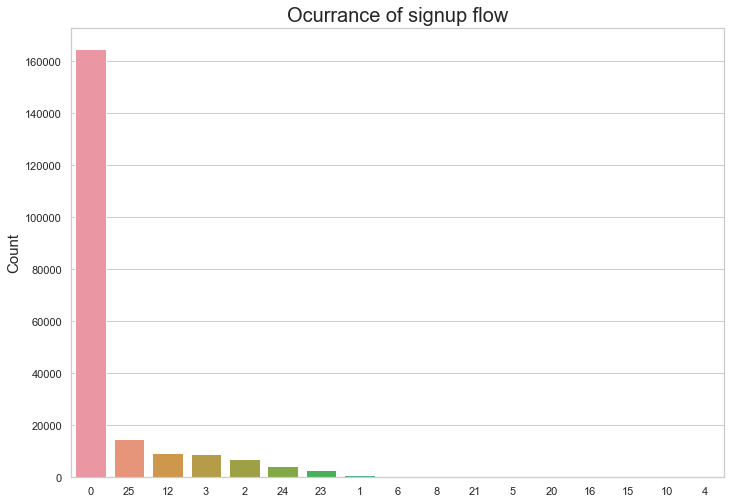

In [90]:
sns.countplot(train_users['signup_flow'],
             order=train_users['signup_flow'].value_counts().index)
plt.title('Ocurrance of signup flow', size=20)
plt.xlabel('', size=15)
plt.ylabel('Count', size=15)

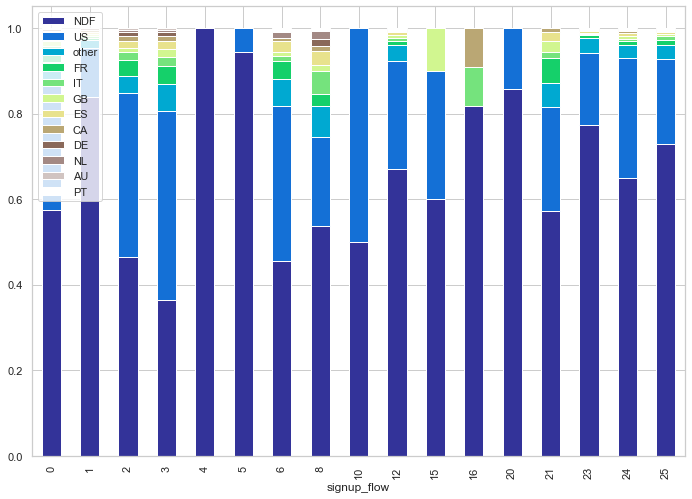

In [91]:
stacked_bar('signup_flow')

- Signup flow 3 are most likely to book;
- Signup flows 4 and 5 are least likely to book.

#### Type of Device, Browser and App Used

C:\Users\julio\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Count')

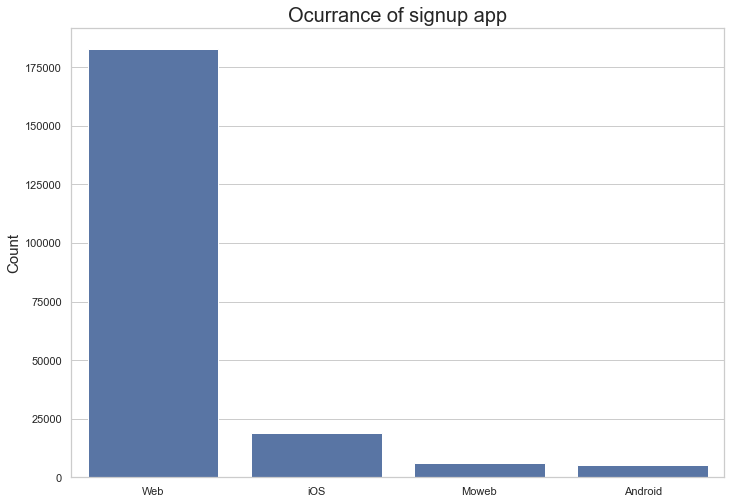

In [92]:
sns.countplot(train_users['signup_app'],
             order=train_users['signup_app'].value_counts().index,
             color='b')
plt.title('Ocurrance of signup app', size=20)
plt.xlabel('', size=15)
plt.ylabel('Count', size=15)

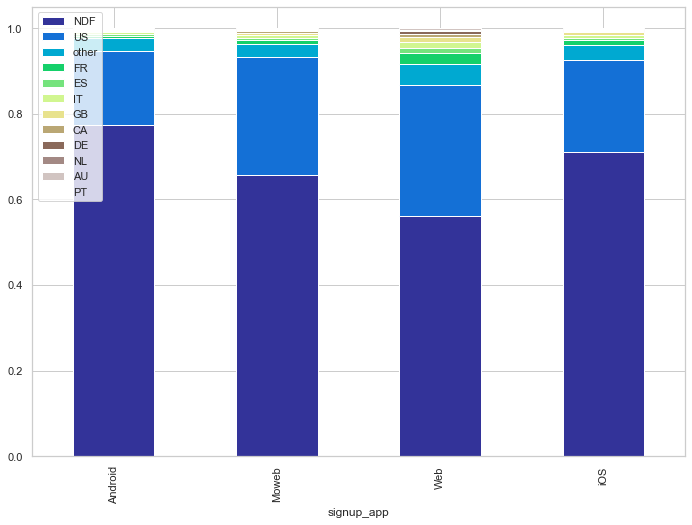

In [93]:
stacked_bar('signup_app')

C:\Users\julio\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Count')

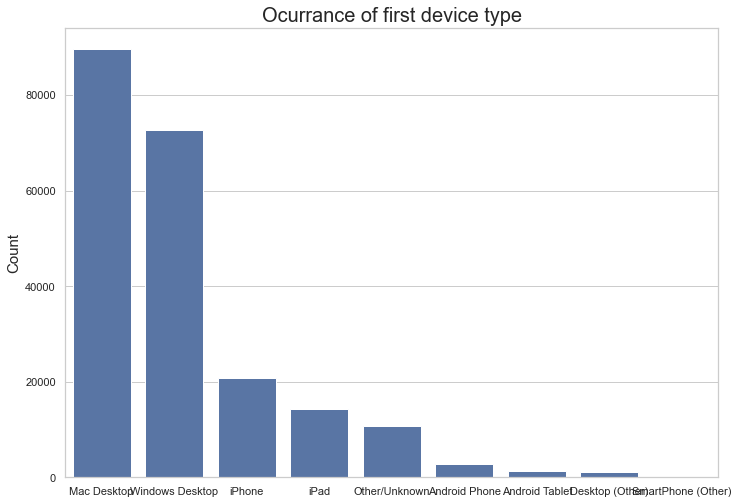

In [94]:
sns.countplot(train_users['first_device_type'],
             order=train_users['first_device_type'].value_counts().index,
             color='b')
plt.title('Ocurrance of first device type', size=20)
plt.xlabel('', size=15)
plt.ylabel('Count', size=15)

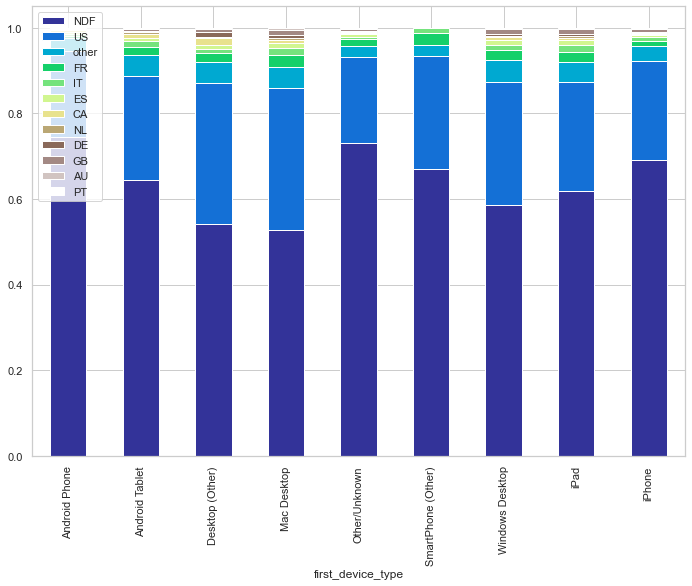

In [95]:
stacked_bar('first_device_type')

- Web App are most likely to book;
- Android Users are least likely to book;
- Android Phone users or users whose devices were unknown bought fewer Airbnbs;
- Probably desktop users books more.

#### Dates

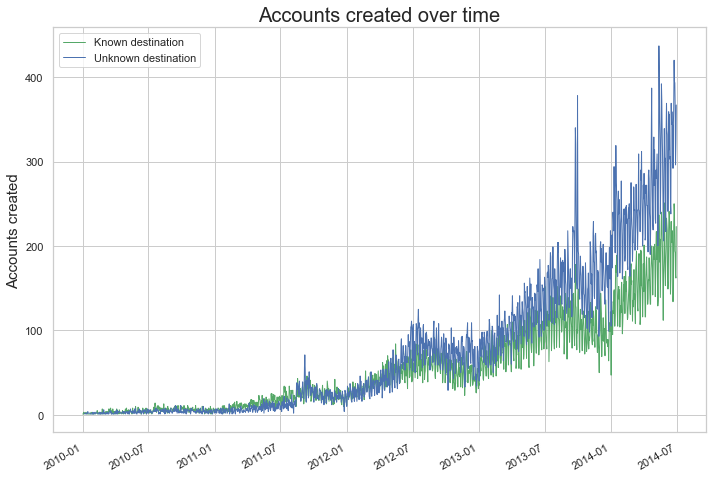

In [96]:
train_users[train_users['country_destination'] !=
            'NDF']['date_account_created'].value_counts().plot(kind='line',
                                                               linewidth=1,
                                                               color='g')

train_users[train_users['country_destination'] ==
            'NDF']['date_account_created'].value_counts().plot(kind='line',
                                                               linewidth=1,
                                                               color='b')
plt.title('Accounts created over time', size=20)
plt.xlabel('', size=15)
plt.ylabel('Accounts created', size=15)
plt.legend(['Known destination', 'Unknown destination'])

The number of non booking users increases more than the number of booking users. This could happen beacouse of one of this reasons:
- Airbnb is getting more known and more people and using it just to check out how it works;
- A user who is on the platform for a longer time is more likely to book.

## Feature Engineering

### Session Features

We will now combine and transform some feature of the datasets to improve our results on machine learning.

#### Sessions

Maybe if the users connects from a lot of different devices is beacouse he travels a lot. And maybe if the user travels a lot he is business traveler. Wich implies he will probably travel to US.

Another hunch we can make is that if the user spent a lot of time on the app is beacouse he will travel soon and is choosing it's location. Beside this, the total number of session types.

The next feature is the avarage seconds per sessions and this idead was extracted from the notebook that inspired this one.

Finally, also an idea from the notebook that inspired this "is number of short sessions. These are sessions less than 300 seconds long. We will construct a number of long sessions by subtracting it from total number of sessions."

To start we will group the features of the sessions dataset by the id and then combine the data.

In [97]:
total_seconds = sessions.groupby('user_id')['secs_elapsed'].sum()
average_seconds = sessions.groupby('user_id')['secs_elapsed'].mean()
total_sessions = sessions.groupby('user_id')['action'].count()
distinct_sessions = sessions.groupby('user_id')['action'].nunique()
num_short_sessions = sessions[sessions['secs_elapsed'] <= 300].groupby(
    'user_id')['action'].count()
num_long_sessions = sessions[sessions['secs_elapsed'] >= 2000].groupby(
    'user_id')['action'].count()
num_devices = sessions.groupby('user_id')['device_type'].nunique()

In [98]:
def session_features(df):
    df['total_seconds'] = df['id'].apply(lambda x: total_seconds[x] if x in total_seconds else 0)
    df['average_seconds'] = df['id'].apply(lambda x: average_seconds[x] if x in average_seconds else 0)
    df['total_sessions'] = df['id'].apply(lambda x: total_sessions[x] if x in total_sessions else 0)
    df['distinct_sessions'] = df['id'].apply(lambda x: distinct_sessions[x] if x in distinct_sessions else 0)
    df['num_short_sessions'] = df['id'].apply(lambda x: num_short_sessions[x] if x in num_short_sessions else 0)
    df['num_long_sessions'] = df['id'].apply(lambda x: num_long_sessions[x] if x in num_long_sessions else 0)
    df['num_devices'] = df['id'].apply(lambda x: num_devices[x] if x in num_devices else 0)
    return df

# Combining the data
train_users = session_features(train_users)
train_users

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination,age_group,total_seconds,average_seconds,total_sessions,distinct_sessions,num_short_sessions,num_long_sessions,num_devices
0,gxn3p5htnn,2010-06-28,20090319043255,NaN,NaN,nan,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF,Unknown,0.000000,0.000000,0,0,0,0,0
1,820tgsjxq7,2011-05-25,20090523174809,NaN,MALE,38.000000,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF,Young,0.000000,0.000000,0,0,0,0,0
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.000000,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US,Middle,0.000000,0.000000,0,0,0,0,0
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.000000,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other,Middle,0.000000,0.000000,0,0,0,0,0
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,NaN,41.000000,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US,Middle,0.000000,0.000000,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213446,zxodksqpep,2014-06-30,20140630235636,NaN,MALE,32.000000,basic,0,en,sem-brand,google,omg,Web,Mac Desktop,Safari,NDF,Young,5142543.000000,46750.390909,110,37,6,51,2
213447,mhewnxesx9,2014-06-30,20140630235719,NaN,NaN,nan,basic,0,en,direct,direct,linked,Web,Windows Desktop,Chrome,NDF,Unknown,2880071.000000,12101.138655,236,24,87,77,3
213448,6o3arsjbb4,2014-06-30,20140630235754,NaN,NaN,32.000000,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,NDF,Young,344129.000000,19118.277778,18,10,5,5,1
213449,jh95kwisub,2014-06-30,20140630235822,NaN,NaN,nan,basic,25,en,other,other,tracked-other,iOS,iPhone,Mobile Safari,NDF,Unknown,342756.000000,4570.080000,75,8,19,39,1


#### Browsers and devices

Now we will recategorize the first browser feature and the devices based on what we learned from the data.

There are 50+ categories of browsers and only 5 represents the majority of our data. A similar thing happens in device types. Only three of our data plus the unknown are significant.

In [99]:
def browsers(df):
    df['first_browser'] = df['first_browser'].apply(lambda x: "Mobile_Safari" if x == "Mobile Safari" else x)
    major_browsers = ['Chrome', 'Safari', 'Firefox', 'IE', 'Mobile_Safari']
    df['first_browser'] = df['first_browser'].apply(lambda x: 'Other' if x not in major_browsers else x)
    return df

# Transforming the data
train_users = browsers(train_users)
train_users

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination,age_group,total_seconds,average_seconds,total_sessions,distinct_sessions,num_short_sessions,num_long_sessions,num_devices
0,gxn3p5htnn,2010-06-28,20090319043255,NaN,NaN,nan,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF,Unknown,0.000000,0.000000,0,0,0,0,0
1,820tgsjxq7,2011-05-25,20090523174809,NaN,MALE,38.000000,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF,Young,0.000000,0.000000,0,0,0,0,0
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.000000,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US,Middle,0.000000,0.000000,0,0,0,0,0
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.000000,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other,Middle,0.000000,0.000000,0,0,0,0,0
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,NaN,41.000000,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US,Middle,0.000000,0.000000,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213446,zxodksqpep,2014-06-30,20140630235636,NaN,MALE,32.000000,basic,0,en,sem-brand,google,omg,Web,Mac Desktop,Safari,NDF,Young,5142543.000000,46750.390909,110,37,6,51,2
213447,mhewnxesx9,2014-06-30,20140630235719,NaN,NaN,nan,basic,0,en,direct,direct,linked,Web,Windows Desktop,Chrome,NDF,Unknown,2880071.000000,12101.138655,236,24,87,77,3
213448,6o3arsjbb4,2014-06-30,20140630235754,NaN,NaN,32.000000,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,NDF,Young,344129.000000,19118.277778,18,10,5,5,1
213449,jh95kwisub,2014-06-30,20140630235822,NaN,NaN,nan,basic,25,en,other,other,tracked-other,iOS,iPhone,Mobile_Safari,NDF,Unknown,342756.000000,4570.080000,75,8,19,39,1


In [100]:
def classify_device(x):
    if x.find('Desktop') != -1:
        return 'Desktop'
    elif x.find('Tablet') != -1 or x.find('iPad') != -1:
        return 'Tablet'
    elif x.find('Phone') != -1:
        return 'Phone'
    else:
        return 'Unknown'

def devices(df):
    df['first_device_type'] = df['first_device_type'].apply(classify_device)
    return df

# Transforming the data
train_users = devices(train_users)
train_users

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination,age_group,total_seconds,average_seconds,total_sessions,distinct_sessions,num_short_sessions,num_long_sessions,num_devices
0,gxn3p5htnn,2010-06-28,20090319043255,NaN,NaN,nan,facebook,0,en,direct,direct,untracked,Web,Desktop,Chrome,NDF,Unknown,0.000000,0.000000,0,0,0,0,0
1,820tgsjxq7,2011-05-25,20090523174809,NaN,MALE,38.000000,facebook,0,en,seo,google,untracked,Web,Desktop,Chrome,NDF,Young,0.000000,0.000000,0,0,0,0,0
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.000000,basic,3,en,direct,direct,untracked,Web,Desktop,IE,US,Middle,0.000000,0.000000,0,0,0,0,0
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.000000,facebook,0,en,direct,direct,untracked,Web,Desktop,Firefox,other,Middle,0.000000,0.000000,0,0,0,0,0
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,NaN,41.000000,basic,0,en,direct,direct,untracked,Web,Desktop,Chrome,US,Middle,0.000000,0.000000,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213446,zxodksqpep,2014-06-30,20140630235636,NaN,MALE,32.000000,basic,0,en,sem-brand,google,omg,Web,Desktop,Safari,NDF,Young,5142543.000000,46750.390909,110,37,6,51,2
213447,mhewnxesx9,2014-06-30,20140630235719,NaN,NaN,nan,basic,0,en,direct,direct,linked,Web,Desktop,Chrome,NDF,Unknown,2880071.000000,12101.138655,236,24,87,77,3
213448,6o3arsjbb4,2014-06-30,20140630235754,NaN,NaN,32.000000,basic,0,en,direct,direct,untracked,Web,Desktop,Firefox,NDF,Young,344129.000000,19118.277778,18,10,5,5,1
213449,jh95kwisub,2014-06-30,20140630235822,NaN,NaN,nan,basic,25,en,other,other,tracked-other,iOS,Phone,Mobile_Safari,NDF,Unknown,342756.000000,4570.080000,75,8,19,39,1


#### Affiliate

The next step is to prepare the features related to affiliation. This will optimize the categories applying the same logic used before.

In [101]:
def affiliate_tracked(df):
    df['first_affiliate_tracked'] = df['first_affiliate_tracked'].fillna('Unknown')
    df['first_affiliate_tracked'] = df['first_affiliate_tracked'].apply(lambda x: 'Other' if x != 'Unknown' and x != 'untracked' else x)
    return df

def affiliate_provider(df):
    df['affiliate_provider'] = df['affiliate_provider'].apply(lambda x: 'rest' if x not in ['direct', 'google', 'other'] else x)
    return df

def affiliate_channel(df):
    df['affiliate_channel'] = df['affiliate_channel'].apply(lambda x: 'other' if x  not in ['direct', 'content'] else x)
    return df

# Transforming the data
train_users = affiliate_tracked(train_users)
train_users = affiliate_provider(train_users)
train_users = affiliate_channel(train_users)
train_users

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination,age_group,total_seconds,average_seconds,total_sessions,distinct_sessions,num_short_sessions,num_long_sessions,num_devices
0,gxn3p5htnn,2010-06-28,20090319043255,NaN,NaN,nan,facebook,0,en,direct,direct,untracked,Web,Desktop,Chrome,NDF,Unknown,0.000000,0.000000,0,0,0,0,0
1,820tgsjxq7,2011-05-25,20090523174809,NaN,MALE,38.000000,facebook,0,en,other,google,untracked,Web,Desktop,Chrome,NDF,Young,0.000000,0.000000,0,0,0,0,0
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.000000,basic,3,en,direct,direct,untracked,Web,Desktop,IE,US,Middle,0.000000,0.000000,0,0,0,0,0
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.000000,facebook,0,en,direct,direct,untracked,Web,Desktop,Firefox,other,Middle,0.000000,0.000000,0,0,0,0,0
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,NaN,41.000000,basic,0,en,direct,direct,untracked,Web,Desktop,Chrome,US,Middle,0.000000,0.000000,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213446,zxodksqpep,2014-06-30,20140630235636,NaN,MALE,32.000000,basic,0,en,other,google,Other,Web,Desktop,Safari,NDF,Young,5142543.000000,46750.390909,110,37,6,51,2
213447,mhewnxesx9,2014-06-30,20140630235719,NaN,NaN,nan,basic,0,en,direct,direct,Other,Web,Desktop,Chrome,NDF,Unknown,2880071.000000,12101.138655,236,24,87,77,3
213448,6o3arsjbb4,2014-06-30,20140630235754,NaN,NaN,32.000000,basic,0,en,direct,direct,untracked,Web,Desktop,Firefox,NDF,Young,344129.000000,19118.277778,18,10,5,5,1
213449,jh95kwisub,2014-06-30,20140630235822,NaN,NaN,nan,basic,25,en,other,other,Other,iOS,Phone,Mobile_Safari,NDF,Unknown,342756.000000,4570.080000,75,8,19,39,1


#### Others

In [102]:
# Since the english language represents a big part of our data, we will simplify this feature.
def languages(df):
    df['language'] = df['language'].apply(lambda x: 'foreign' if x != 'en' else x)
    return df

In [103]:
# In our exploratory analysis we realized that the signup flow category "3" influences a lot on the booking.
# Based on this we will create a categorical field to it.
train_users['is_3'] = train_users['signup_flow'].apply(lambda x: 1 if x==3 else 0)

In [104]:
# In one of our statistical tests we concluded that the gender affects on the
# first country visited. So this feature will be maintened and the NaN replace by "Unknown".
train_users['gender'] = train_users['gender'].fillna('Unknown')

In [105]:
# The age is no longer useful beacouse we already have the age group. So i will just drop it.
train_users = train_users.drop('age', axis=1)
# This feature was also irrelevant
train_users = train_users.drop('timestamp_first_active', axis=1)

In [106]:
# We didn't find any relevant information in this feature. So we will drop it.
def first_booking(df):
    df = df.drop('date_first_booking', axis=1)
    return df

In [107]:
# We did made some assumptions based on this feature. But nothing trully relevant could be infered. This is also being droped.
def account_created(df):
    df = df.drop('date_account_created', axis=1)
    return df

In [108]:
# Transforming the data
train_users = languages(train_users)
train_users = first_booking(train_users)
train_users = account_created(train_users)
train_users

,id,gender,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination,age_group,total_seconds,average_seconds,total_sessions,distinct_sessions,num_short_sessions,num_long_sessions,num_devices,is_3
0,gxn3p5htnn,Unknown,facebook,0,en,direct,direct,untracked,Web,Desktop,Chrome,NDF,Unknown,0.000000,0.000000,0,0,0,0,0,0
1,820tgsjxq7,MALE,facebook,0,en,other,google,untracked,Web,Desktop,Chrome,NDF,Young,0.000000,0.000000,0,0,0,0,0,0
2,4ft3gnwmtx,FEMALE,basic,3,en,direct,direct,untracked,Web,Desktop,IE,US,Middle,0.000000,0.000000,0,0,0,0,0,1
3,bjjt8pjhuk,FEMALE,facebook,0,en,direct,direct,untracked,Web,Desktop,Firefox,other,Middle,0.000000,0.000000,0,0,0,0,0,0
4,87mebub9p4,Unknown,basic,0,en,direct,direct,untracked,Web,Desktop,Chrome,US,Middle,0.000000,0.000000,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213446,zxodksqpep,MALE,basic,0,en,other,google,Other,Web,Desktop,Safari,NDF,Young,5142543.000000,46750.390909,110,37,6,51,2,0
213447,mhewnxesx9,Unknown,basic,0,en,direct,direct,Other,Web,Desktop,Chrome,NDF,Unknown,2880071.000000,12101.138655,236,24,87,77,3,0
213448,6o3arsjbb4,Unknown,basic,0,en,direct,direct,untracked,Web,Desktop,Firefox,NDF,Young,344129.000000,19118.277778,18,10,5,5,1,0
213449,jh95kwisub,Unknown,basic,25,en,other,other,Other,iOS,Phone,Mobile_Safari,NDF,Unknown,342756.000000,4570.080000,75,8,19,39,1,0


#### Final preparations

In [109]:
# Setting the uses to index, since we will don't want it to influences the learning.
train_users = train_users.set_index('id')

In [110]:
# Splitting the data into features and target
y = train_users['country_destination']
X = train_users.drop('country_destination', axis=1)

In [111]:
# Transforming the categorical data in dummies
X = pd.get_dummies(X, prefix='is')

In [120]:
# Had to rename the columns beacouse the duplicated column names were generating an error on PyCaret
train_users = X.copy()
train_users['country_destination'] = y
train_users.columns = ['signup_flow', 'total_seconds', 'average_seconds', 'total_sessions',
       'distinct_sessions', 'num_short_sessions', 'num_long_sessions',
       'num_devices', 'is_3', 'is_FEMALE', 'is_MALE', 'is_OTHER', 'is_Unknown1',
       'is_basic', 'is_facebook', 'is_google1', 'is_en', 'is_foreign',
       'is_content', 'is_direct1', 'is_other1', 'is_direct2', 'is_google2',
       'is_other2', 'is_rest', 'is_Other3', 'is_Unknown2', 'is_untracked',
       'is_Android', 'is_Moweb', 'is_Web', 'is_iOS', 'is_Desktop', 'is_Phone',
       'is_Tablet', 'is_Unknown3', 'is_Chrome', 'is_Firefox', 'is_IE',
       'is_Mobile_Safari', 'is_Other4', 'is_Safari', 'is_Middle', 'is_Old',
       'is_Unknown4', 'is_Young', 'country_destination']

## Machine Learning

To make a modeling comparison i will first use PyCaret, an AutoML Library. Once the best model is defined, we will proceed to the hyperparameter tunning.

In [121]:
clf = setup(data=train_users, target='country_destination')

Setup Succesfully Completed!


,Description,Value
0,session_id,6367
1,Target Type,Multiclass
2,Label Encoded,"AU: 0, CA: 1, DE: 2, ES: 3, FR: 4, GB: 5, IT: 6, NDF: 7, NL: 8, PT: 9, US: 10, other: 11"
3,Original Data,"(213451, 47)"
4,Missing Values,False
5,Numeric Features,43
6,Categorical Features,3
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [122]:
best = compare_models(sort='Accuracy')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
0,Light Gradient Boosting Machine,0.6355,0.0000,0.1110,0.5556,0.5877,0.2714,0.2809,2.8675
1,CatBoost Classifier,0.6346,0.0000,0.1102,0.5542,0.5854,0.2657,0.2761,42.3928
2,Extreme Gradient Boosting,0.6337,0.0000,0.1105,0.5485,0.5861,0.2682,0.2775,19.3735
3,Gradient Boosting Classifier,0.6321,0.0000,0.1111,0.5527,0.5857,0.2671,0.2761,85.1757
4,Ridge Classifier,0.6304,0.0000,0.1087,0.5410,0.5798,0.2531,0.2644,0.0865
5,Linear Discriminant Analysis,0.6289,0.0000,0.1095,0.5443,0.5823,0.2607,0.2693,0.3275
6,Ada Boost Classifier,0.6217,0.0000,0.1068,0.5359,0.5714,0.2348,0.2468,2.4633
7,Random Forest Classifier,0.6090,0.0000,0.1069,0.5373,0.5663,0.2249,0.2324,0.1323
8,Extra Trees Classifier,0.6070,0.0000,0.1068,0.5379,0.5661,0.2248,0.2318,1.1161
9,Logistic Regression,0.5835,0.0000,0.0833,0.3405,0.4300,0.0000,0.0000,3.7846


The best classifier (without hyperparameter tunning) is the LightGBM. This is a model constructed by Microsoft that runs a Gradient Boosting Classifier and it's principals benefits are that it's faster and more accurate (in most of the cases).

The accuracy is used for compairson beacouse this is the criteria used on the competition.

We will proceed with LGBM model, despite we could use the conventional GB from sklearn.

In [123]:
# Creating a model with LGBM
dt = create_model('lightgbm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.6362,0.0000,0.1110,0.5496,0.5884,0.2727,0.2822
1,0.6382,0.0000,0.1124,0.5538,0.5925,0.2837,0.2915
2,0.6353,0.0000,0.1129,0.5700,0.5882,0.2716,0.2809
3,0.6328,0.0000,0.1109,0.5694,0.5850,0.2650,0.2746
4,0.6301,0.0000,0.1101,0.5681,0.5832,0.2621,0.2708
5,0.6410,0.0000,0.1114,0.5527,0.5920,0.2809,0.2912
6,0.6330,0.0000,0.1099,0.5457,0.5845,0.2648,0.2745
7,0.6394,0.0000,0.1115,0.5523,0.5911,0.2786,0.2886
8,0.6374,0.0000,0.1109,0.5496,0.5884,0.2723,0.2827
9,0.6312,0.0000,0.1096,0.5448,0.5834,0.2626,0.2719


In [124]:
# Auto tunning parameter to optmize the accuracy, as explained earlier
tuned_dt = tune_model(dt, optimize='Accuracy')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.6418,0.0000,0.1123,0.5544,0.5937,0.2842,0.2939
1,0.6373,0.0000,0.1120,0.5521,0.5910,0.2801,0.2882
2,0.6348,0.0000,0.1109,0.5481,0.5871,0.2709,0.2799
3,0.6319,0.0000,0.1103,0.5455,0.5844,0.2650,0.2739
4,0.6359,0.0000,0.1115,0.5502,0.5892,0.2763,0.2846
5,0.6386,0.0000,0.1113,0.5508,0.5902,0.2773,0.2869
6,0.6359,0.0000,0.1105,0.5478,0.5871,0.2707,0.2804
7,0.6386,0.0000,0.1113,0.5506,0.5899,0.2763,0.2862
8,0.6352,0.0000,0.1109,0.5946,0.5867,0.2685,0.2785
9,0.6348,0.0000,0.1106,0.5478,0.5868,0.2702,0.2795


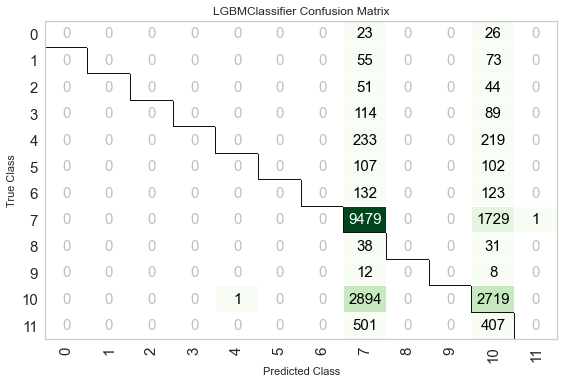

In [125]:
# Checking the predicted results
plot_model(tuned_dt, plot='confusion_matrix')

Above we can verify that our model **predicted only 4 of our 11 possible predictions.**. Besides that, two of the classes had only one prediction each.


This for certain is not a great result, but something like this it's expected. The majority of our taining data were from US or NDF, só it was expected to get more predictions on these two classes.

This could be improved with other techniques, but for now we will proceed to the submission.

In [127]:
# Finalizing and saving the model
final_model = finalize_model(tuned_dt)

In [134]:
# Giving the test data the same features and treatment we gave to the train data.
def feature_engineering(df):
    df = session_features(df)
    df = df.drop('age', axis=1)
    df = browsers(df)
    df = devices(df)
    df = affiliate_tracked(df)
    df = affiliate_provider(df)
    df = affiliate_channel(df)
    df = languages(df)
    df['is_3'] = df['signup_flow'].apply(lambda x: 1 if x == 3 else 0)
    df = first_booking(df)
    df = df.drop('timestamp_first_active', axis=1)
    df = account_created(df)
    df = df.set_index('id')
    df = pd.get_dummies(df, prefix='is')
    return df


test_users['gender'] = test_users['gender'].replace('-unknown-', 'Unknown')
test_users['age_group'] = test_users['age'].apply(set_age_group)
test_users = feature_engineering(test_users)
test_users = test_users.drop('is_weibo', axis=1)
test_users.columns = [
    'signup_flow', 'total_seconds', 'average_seconds', 'total_sessions',
    'distinct_sessions', 'num_short_sessions', 'num_long_sessions',
    'num_devices', 'is_3', 'is_FEMALE', 'is_MALE', 'is_OTHER', 'is_Unknown1',
    'is_basic', 'is_facebook', 'is_google1', 'is_en', 'is_foreign',
    'is_content', 'is_direct1', 'is_other1', 'is_direct2', 'is_google2',
    'is_other2', 'is_rest', 'is_Other3', 'is_Unknown2', 'is_untracked',
    'is_Android', 'is_Moweb', 'is_Web', 'is_iOS', 'is_Desktop', 'is_Phone',
    'is_Tablet', 'is_Unknown3', 'is_Chrome', 'is_Firefox', 'is_IE',
    'is_Mobile_Safari', 'is_Other4', 'is_Safari', 'is_Middle', 'is_Old',
    'is_Unknown4', 'is_Young'
]

In [135]:
# Making the predictions
predictions = predict_model(final_model, data=test_users)

In [156]:
test_users['country'] = predictions['Label']

In [159]:
submission = test_users.reset_index(drop=False)[['id', 'country']]
submission

,id,country
0,5uwns89zht,NDF
1,jtl0dijy2j,NDF
2,xx0ulgorjt,NDF
3,6c6puo6ix0,NDF
4,czqhjk3yfe,NDF
...,...,...
62091,cv0na2lf5a,US
62092,zp8xfonng8,NDF
62093,fa6260ziny,NDF
62094,87k0fy4ugm,NDF


In [162]:
submission.to_csv('submit.csv', index=False)

This notebook got a score of 0.72047 on kaggle.